# Aplicación de Técnicas de Validación Cruzada
• **Objetivo:**  
Aplicar y comparar diferentes técnicas de validación cruzada y métricas de evaluación sobre un modelo predictivo, utilizando datos reales. El estudiante deberá interpretar y justificar los resultados obtenidos en base a las métricas de rendimiento como precisión, recall, F1-Score, matriz de confusión, y curvas ROC y Precision-Recall.   

• **Contexto:**  
Dado un conjunto de datos sobre clientes (por ejemplo, predicción de si un cliente abandonará un servicio o si tiene
una alta probabilidad de fraude), el objetivo es aplicar técnicas de validación cruzada para evaluar la precisión  del
modelo, analizando la capacidad de generalización del mismo.

----

Este notebook tiene como objetivo realizar una aplicación y comparación rigurosa de diferentes técnicas de validación cruzada sobre un modelo predictivo. Se profundizará en la interpretación de métricas de rendimiento clave (Precisión, Recall, F1-Score, Matriz de Confusión, Curvas ROC y Precision-Recall) para evaluar de manera robusta la capacidad de generalización y la estabilidad de un modelo en un problema de clasificación del mundo real.

### Estructura del Notebook

1.  **Configuración del Entorno y Carga de Datos**: Importación de librerías y carga robusta del dataset.
2.  **Preprocesamiento y Creación de Pipelines**: Encapsulamiento de la preparación de datos para prevenir la fuga de información (data leakage).
3.  **División Estratégica de Datos**: Separación de los datos en conjuntos de entrenamiento y prueba.
4.  **Evaluación Comparativa con Validación Cruzada**: Aplicación y análisis detallado de K-Fold, Stratified K-Fold y Leave-One-Out.
5.  **Entrenamiento y Evaluación Final del Modelo**: Entrenamiento del modelo definitivo y su evaluación en el conjunto de prueba.
6.  **Visualización e Interpretación de Resultados**: Creación de gráficos avanzados para un análisis profundo del rendimiento.
7.  **Análisis Comparativo y Conclusiones**: Discusión de los hallazgos y justificación de la técnica más adecuada.

-----

## 1\. Configuración del Entorno y Carga de Datos

### 1.1. Importación de Librerías

Antes de cualquier análisis, es fundamental importar las herramientas (librerías) que necesitaremos. Organizar las importaciones al principio del script es una buena práctica que mejora la legibilidad y asegura que todos los requisitos estén definidos desde el inicio. Las agrupamos por funcionalidad para entender rápidamente qué tipo de operaciones se realizarán:

  * **Manipulación de Datos**: `pandas` y `numpy` son el estándar de oro en Python para trabajar con datos estructurados y realizar operaciones numéricas eficientes.
  * **Visualización**: `matplotlib` y `seaborn` nos permiten crear gráficos estáticos y estéticamente agradables para interpretar los resultados de forma visual.
  * **Preprocesamiento y Modelado**: `scikit-learn` es la librería más importante para Machine Learning en Python. De ella importamos módulos específicos para cada tarea: preprocesamiento de datos, modelos de clasificación, estrategias de validación cruzada y métricas de evaluación.

<!-- end list -->

In [ ]:
# --- Fundamentales para Manipulación de Datos ---
import pandas as pd
import numpy as np
# import warnings
# warnings.filterwarnings('ignore') # Ignorar advertencias para una salida más limpia

# --- Librerías para Visualización ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Módulos de Scikit-learn para Preprocesamiento ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# --- Modelos y Métricas de Scikit-learn ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (cross_val_score, cross_validate,
                                   KFold, StratifiedKFold, LeaveOneOut, TimeSeriesSplit)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
                           classification_report, roc_curve, precision_recall_curve)

# --- Configuración de Estilo para Visualizaciones ---
# Define un estilo visual consistente y agradable para todos los gráficos.
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
print("✓ Librerías importadas y entorno configurado.")

✓ Librerías importadas y entorno configurado.


In [ ]:
%pip install kagglehub

### **Carga de Datos a Prueba de Fallos**

Imaginemos que necesitamos construir un modelo predictivo, pero para empezar, necesitamos los datos. Este código actúa como un asistente de logística de datos muy inteligente y precavido. Su misión principal es obtener un conjunto de datos específico sobre la cancelación de clientes de una empresa de telecomunicaciones (Telco) desde la plataforma Kaggle.

Sin embargo, su característica más profesional es que **está preparado para el fracaso**. Sabe que las descargas por internet pueden fallar por muchas razones (no hay conexión, un error en el servidor, credenciales incorrectas, etc.). En lugar de simplemente detenerse y mostrar un error, tiene un ingenioso **plan de respaldo** para asegurar que siempre tengas datos con los que trabajar.

---

### **El Proceso Principal: El Intento de Descarga**

La primera acción que realiza el código es intentar el "camino ideal":
1.  **Conexión con Kaggle:** Utiliza una herramienta especializada para conectarse a Kaggle y solicita la descarga del dataset "Telco Customer Churn".
2.  **Verificación del Archivo:** Una vez descargado el paquete, no da por sentado que todo esté bien. Realiza una segunda verificación para asegurarse de que el archivo CSV específico que necesita está realmente allí y es accesible.
3.  **Carga Exitosa:** Si todo sale bien, carga los datos en una tabla estructurada (un DataFrame) y le pone una etiqueta interna de `"telco"` para recordar que está trabajando con los datos reales.

---

### **El Plan de Respaldo: Creación de Datos Sintéticos**

Si en algún punto del proceso anterior algo sale mal, se activa el plan de respaldo. En lugar de rendirse, el código decide **fabricar un conjunto de datos artificial** que se parezca lo más posible al original.

Este no es un conjunto de datos aleatorio y sin sentido. Está cuidadosamente diseñado para imitar las propiedades estadísticas clave del dataset real:

* **Tamaño Idéntico:** Crea exactamente el mismo número de filas que el original (7,043 clientes).
* **Estructura Similar:** Genera un número similar de columnas o características.
* **Desbalance de Clases Realista:** Este es un punto crucial. Sabe que en el dataset real, aproximadamente el 27% de los clientes cancelaron su servicio. El código replica esta misma proporción en los datos falsos. Esto es vital para entrenar un modelo de machine learning de manera realista.
* **Consistencia Garantizada:** Gracias a una "semilla" numérica fija, cada vez que genera los datos sintéticos, estos son **exactamente los mismos**. Esto asegura que los experimentos y pruebas que se realicen con estos datos sean siempre consistentes y reproducibles.

Cuando termina de crear esta tabla artificial, le asigna una etiqueta interna de `"synthetic"` para que el sistema sepa que está usando el plan de respaldo.

---

### **Verificación y Resumen**

Una vez que el código ha obtenido los datos, ya sea por la vía real o por el plan de respaldo, ejecuta un último paso: presentar un informe.

Muestra en pantalla un resumen claro y conciso que informa al usuario sobre lo que acaba de suceder:
1.  **Informa qué tipo de datos se cargaron**: Muestra claramente si se está usando el dataset `"TELCO"` (real) o el `"SYNTHETIC"` (artificial).
2.  **Muestra las dimensiones**: Indica cuántas filas y columnas tiene la tabla de datos.
3.  **Presenta una Muestra**: Muestra las primeras cinco filas de la tabla para que el usuario pueda hacer una rápida inspección visual.

En resumen, este script es un ejemplo de **programación defensiva y robusta**. Su diseño modular y su capacidad para manejar errores lo convierten en una herramienta profesional que garantiza la continuidad del trabajo, incluso cuando las condiciones no son ideales.

In [ ]:
import kagglehub
import os
import pandas as pd
from sklearn.datasets import make_classification

def create_synthetic_dataset():
    """Crea un dataset sintético como respaldo si la descarga falla."""
    print("⚠️ Creando dataset sintético como respaldo...")

    X_synthetic, y_synthetic = make_classification(
        n_samples=7043,          # Mismo número de clientes que el dataset Telco original
        n_features=19,           # Similar número de características predictoras
        n_informative=15,        # Características que realmente aportan información
        n_redundant=4,           # Características que son combinaciones de las informativas
        n_clusters_per_class=1,  # Estructura de los datos
        weights=[0.73, 0.27],    # Proporción similar de clases (No Churn vs Churn)
        random_state=42          # Semilla para reproducibilidad
    )

    # Crear un DataFrame de Pandas
    feature_names = [f'feature_{i}' for i in range(19)]
    df = pd.DataFrame(X_synthetic, columns=feature_names)
    df['Churn'] = y_synthetic

    print("✓ Dataset sintético creado con éxito.")
    return df, "synthetic"

def load_telco_dataset():
    """Carga el dataset 'Telco Customer Churn' desde Kaggle Hub."""
    try:
        # Intentar descargar el dataset
        print("🔄 Descargando dataset desde Kaggle Hub...")
        path = kagglehub.dataset_download("blastchar/telco-customer-churn")
        print(f"✓ Dataset descargado en la ruta: {path}")

        # Construir la ruta completa al archivo CSV
        file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
        full_path = os.path.join(path, file_name)

        # Verificar si el archivo existe y cargarlo
        if os.path.exists(full_path):
            df = pd.read_csv(full_path)
            print(f"✓ Dataset cargado exitosamente desde: {full_path}")
            return df, "telco"
        else:
            print(f"❌ Archivo no encontrado en la ruta: {full_path}")
            return create_synthetic_dataset()

    except Exception as e:
        print(f"❌ Error durante la descarga del dataset: {e}")
        return create_synthetic_dataset()

def show_dataset_info(df, dataset_type):
    """Muestra información básica y las primeras filas del dataset cargado."""
    if df is not None:
        print("\n" + "="*50)
        print(f"📊 TIPO DE DATASET CARGADO: {dataset_type.upper()}")
        print("="*50)
        print(f"📐 Forma del dataset: {df.shape}")
        print("\n🔍 Primeras 5 filas:")
        print(df.head())
        print("="*50 + "\n")
    else:
        print("❌ El DataFrame no está disponible para mostrar información.")

# --- EJECUCIÓN PRINCIPAL DEL BLOQUE 1 ---
# Cargar el dataset (real o sintético como respaldo)
df, dataset_type = load_telco_dataset()

# Mostrar información básica del dataset que se ha cargado
show_dataset_info(df, dataset_type)

🔄 Descargando dataset desde Kaggle Hub...
Using Colab cache for faster access to the 'telco-customer-churn' dataset.
✓ Dataset descargado en la ruta: /kaggle/input/telco-customer-churn
✓ Dataset cargado exitosamente desde: /kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv

📊 TIPO DE DATASET CARGADO: TELCO
📐 Forma del dataset: (7043, 21)

🔍 Primeras 5 filas:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...      

### **La Investigación del Detective de Datos 🕵️‍♂️**

Este código realiza lo que se conoce como un **Análisis Exploratorio de Datos** (o EDA, por sus siglas en inglés). Piensa en él como el trabajo de un detective al llegar a la escena de un crimen. Antes de acusar a nadie o formular una teoría compleja, el detective primero examina toda la evidencia, toma notas, busca pistas, identifica a los involucrados y trata de entender el contexto general.

De la misma manera, este script no construye un modelo predictivo ni llega a conclusiones finales. Su único objetivo es **"interrogar" a los datos** para comprender a fondo su estructura, identificar posibles problemas, descubrir patrones interesantes y visualizar sus características más importantes. Este paso es fundamental y sienta las bases para cualquier proyecto de ciencia de datos exitoso.

---

### **Paso 1: Preparación de la "Escena del Crimen"**

Antes de que comience el análisis principal, el código realiza una preparación esencial para asegurarse de que la investigación sea limpia y no contamine la evidencia original.

1.  **Crear una Copia Segura:** Primero, crea un duplicado exacto del conjunto de datos original. Esto es una práctica profesional crucial que permite experimentar y hacer modificaciones para el análisis sin alterar ni dañar los datos originales.

2.  **Limpieza Específica:** A continuación, realiza un par de ajustes básicos que son necesarios *solo si* está trabajando con el conjunto de datos real de "Telco" (y no con una versión sintética).
    * **Corregir un Campo Numérico:** Se enfoca en la columna que registra los "cargos totales" de un cliente. A veces, esta columna puede contener valores que no son números (por ejemplo, un espacio en blanco para clientes nuevos). El código convierte toda la columna a un formato estrictamente numérico, marcando cualquier valor problemático como "desconocido" o "nulo" para poder manejarlo después.
    * **Eliminar Identificadores Inútiles:** Descarta la columna de "ID de Cliente". Al igual que el número de cédula de una persona, este es un identificador único que no ofrece ninguna pista sobre su comportamiento. No ayuda a predecir si un cliente se dará de baja, por lo que se elimina para simplificar el análisis.

---

### **Paso 2: El Proceso de Investigación Sistemática**

Una vez que la escena está preparada, el "detective" comienza su investigación en una secuencia lógica y ordenada.

1.  **Revisión del "Expediente General":** El primer paso es obtener una vista panorámica de los datos. El código genera un informe que responde a preguntas básicas como: ¿Cuántos registros (clientes) hay? ¿Cuántas columnas (características) tenemos? ¿Qué tipo de dato contiene cada columna (texto, números enteros, decimales)? Esto es como leer la carátula de un expediente para entender su contenido.

2.  **Análisis Forense de los Números:** A continuación, se centra exclusivamente en las columnas numéricas (como la antigüedad del cliente, el pago mensual, etc.). Calcula un resumen estadístico que revela la media (el promedio), la desviación estándar (qué tan dispersos están los datos), el valor mínimo, el máximo y los percentiles. Esto ayuda a detectar rápidamente anomalías, como un pago mensual de cero o un cliente con una antigüedad imposiblemente alta.

3.  **Búsqueda de "Evidencia Faltante":** Un paso crítico en cualquier investigación es saber qué información *no* se tiene. El código recorre cada columna y cuenta meticulosamente cuántas celdas están vacías o nulas. Este informe es vital, ya que los valores faltantes pueden arruinar un modelo si no se tratan adecuadamente más adelante.

4.  **Foco en el "Asunto Principal" - El Churn:** Ahora, la investigación se centra en la variable más importante: la columna "Churn", que indica si un cliente abandonó la empresa o no. El script realiza dos cosas:
    * **Visualización:** Crea un gráfico de barras muy claro que muestra visualmente cuántos clientes se quedaron en comparación con cuántos se fueron.  Esto permite ver de un vistazo si existe un desbalance significativo entre las dos clases.
    * **Cálculo de Proporciones:** Además del gráfico, calcula y muestra los porcentajes exactos. Por ejemplo, podría informar que "el 73.46% de los clientes no cancelaron, mientras que el 26.54% sí lo hicieron".

5.  **Análisis de las Variables Categóricas:** Finalmente, el código examina todas las demás características que son textuales o categóricas (como el género, si tienen servicio de internet, el tipo de contrato, etc.). Para cada una de estas columnas, genera un gráfico de barras individual que muestra la distribución de sus valores. Por ejemplo, un gráfico mostrará cuántos clientes tienen contrato mes a mes, a un año o a dos años. Esta serie de visualizaciones es extremadamente útil para descubrir qué grupos de clientes son más comunes y para empezar a formular hipótesis sobre qué características podrían estar relacionadas con la cancelación del servicio. 📊

---

### **Conclusión: El Informe del Detective**

Al final de la ejecución, el script no entrega una respuesta definitiva, sino algo mucho más valioso en esta etapa: un **informe completo y comprensible sobre el estado de los datos**. El analista ahora sabe la estructura, las fortalezas, las debilidades (como los datos faltantes) y los patrones visuales más evidentes de su conjunto de datos, y está perfectamente preparado para la siguiente fase: la construcción del modelo predictivo.

--- Iniciando Análisis Exploratorio de Datos (EDA) ---

--- 1. Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   o

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000



--- 3. Conteo de Valores Faltantes por Columna ---
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

--- 4. Distribución de la Variable Objetivo (Churn) ---


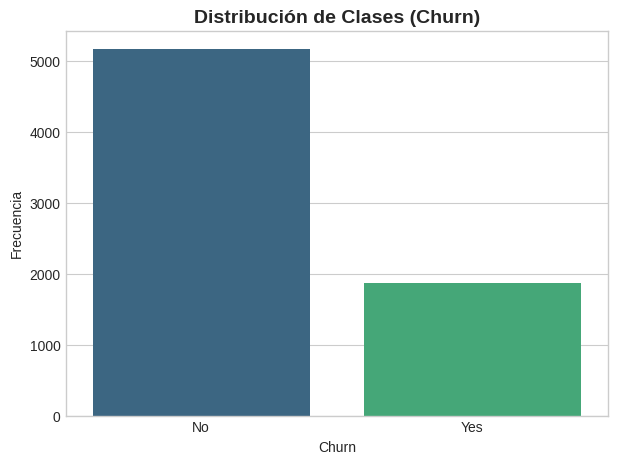

Proporción de Churn:
  No: 73.46%
  Yes: 26.54%

--- 5. Distribución de Variables Categóricas ---


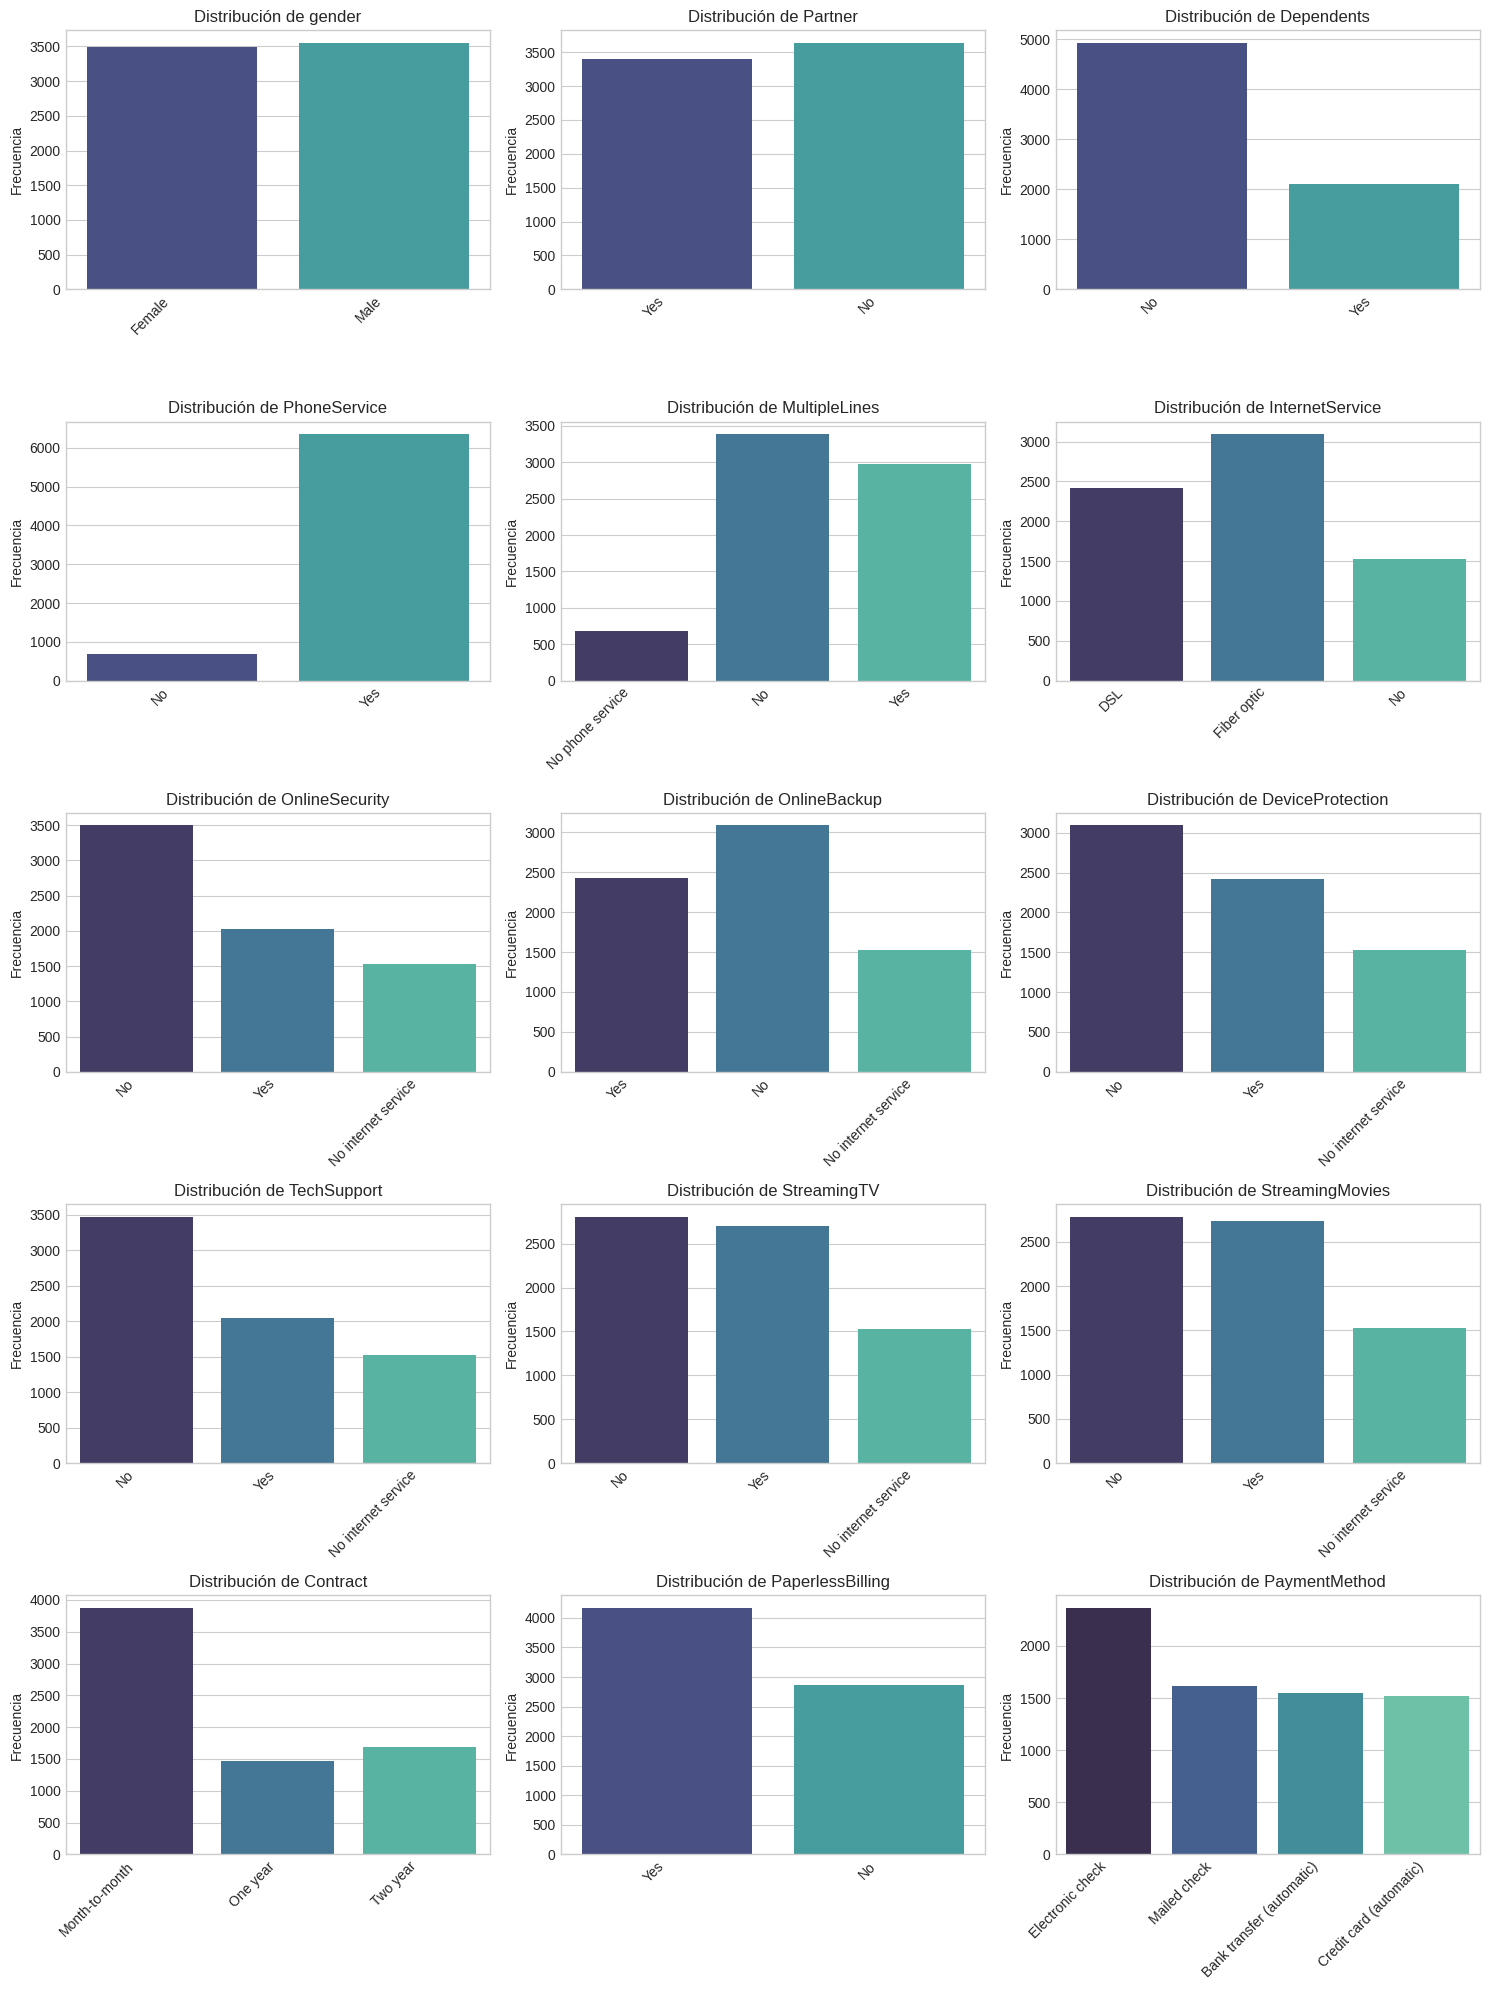


--- EDA Completado ---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Asegurarse de que pandas está importado aquí

print("--- Iniciando Análisis Exploratorio de Datos (EDA) ---")

# --- Limpieza Inicial para el EDA (solo si es el dataset Telco) ---
# Se realiza una copia para no alterar el DataFrame original durante el análisis.
df_eda = df.copy()

# Asegurarse de que dataset_type está disponible
if 'dataset_type' not in locals():
    print("Advertencia: 'dataset_type' no está definido. Asumiendo dataset 'telco' para EDA.")
    dataset_type = "telco" # Asumir telco si no está definido

if dataset_type == "telco":
    # Convertir 'TotalCharges' a numérico para poder calcular estadísticas.
    # Usar errors='coerce' para convertir valores no numéricos en NaN.
    df_eda['TotalCharges'] = pd.to_numeric(df_eda['TotalCharges'], errors='coerce')
    # Eliminar 'customerID', que es un identificador único y no aporta valor predictivo.
    df_eda = df_eda.drop('customerID', axis=1, errors='ignore')

# 1. Información General y Tipos de Datos
print("\n--- 1. Información General del DataFrame ---")
df_eda.info()

# 2. Estadísticas Descriptivas para Columnas Numéricas
print("\n--- 2. Estadísticas Descriptivas (Columnas Numéricas) ---")
numeric_cols_eda = df_eda.select_dtypes(include=np.number).columns
if not numeric_cols_eda.empty:
    # Asegurarse de que TotalCharges es numérico antes de describe()
    # Si TotalCharges aún tiene NaNs después de coerce, describe() lo manejará.
    display(df_eda[numeric_cols_eda].describe())
else:
    print("No se encontraron columnas numéricas para describir.")

# 3. Verificación de Valores Faltantes
print("\n--- 3. Conteo de Valores Faltantes por Columna ---")
print(df_eda.isnull().sum())

# 4. Distribución de la Variable Objetivo ('Churn')
print("\n--- 4. Distribución de la Variable Objetivo (Churn) ---")
plt.figure(figsize=(7, 5))
# Usar hue='Churn' y legend=False para evitar FutureWarning
sns.countplot(x='Churn', data=df_eda, palette='viridis', hue='Churn', legend=False)
plt.title('Distribución de Clases (Churn)', fontsize=14, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir la proporción para mayor claridad
churn_counts = df_eda['Churn'].value_counts() # Usar value_counts sin normalize=True aquí
print("Proporción de Churn:")
total_samples = df_eda.shape[0]
# Iterar a través de las cuentas y imprimir la proporción formateada
for class_label, count in churn_counts.items():
    proportion = count / total_samples
    print(f"  {class_label}: {proportion:.2%}")


# 5. Visualización de Variables Categóricas
print("\n--- 5. Distribución de Variables Categóricas ---")
categorical_cols_eda = df_eda.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Churn' in categorical_cols_eda:
    categorical_cols_eda.remove('Churn')

if categorical_cols_eda:
    n_cols = 3
    n_rows = (len(categorical_cols_eda) + n_cols - 1) // n_cols
    plt.figure(figsize=(n_cols * 5, n_rows * 4))

    for i, col in enumerate(categorical_cols_eda):
        plt.subplot(n_rows, n_cols, i + 1)
        # Usar hue=col y legend=False para evitar FutureWarning
        sns.countplot(x=col, data=df_eda, palette='mako', hue=col, legend=False)
        plt.title(f'Distribución de {col}')
        plt.xlabel('')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron otras columnas categóricas para visualizar.")

print("\n--- EDA Completado ---")

### **Propósito General: Construir una "Fábrica de Procesamiento de Datos" 🏭**

Piensa en este código como el diseño y la construcción de una **línea de ensamblaje industrial automatizada**. Su objetivo no es analizar los datos ni crear un modelo final, sino construir una "fábrica" (un `Pipeline`) que tomará los datos crudos y desordenados y los transformará, paso a paso, en piezas perfectamente limpias, estandarizadas y listas para ser utilizadas por un algoritmo de machine learning.

Los algoritmos son como motores de alta precisión: no puedes simplemente echarles arena, piedras y madera (datos crudos). Necesitan piezas metálicas de un tamaño exacto y conectores de plástico estandarizados (datos procesados). Este script construye la maquinaria que realiza esa transformación de manera eficiente y consistente.

---

### **Fase 1: Preparación de la Materia Prima**

Antes de que la línea de ensamblaje se ponga en marcha, un operario realiza una preparación inicial de los materiales.

1.  **Duplicado de Seguridad:** Primero, se hace una copia de los datos originales. Esto es para asegurar que la "materia prima" original permanezca intacta y sin alteraciones.

2.  **Ajustes Manuales:** Se realizan algunas conversiones básicas para que los materiales sean manejables:
    * **Traducción del Objetivo:** La columna principal, "Churn", que indica si un cliente se fue o no, se traduce a un lenguaje universal para las máquinas: el binario. Las palabras "Yes" y "No" se convierten en **1** y **0**, respectivamente.
    * **Limpieza de Otros Materiales:** Se realizan las mismas limpiezas que en la fase de análisis: se corrigen los números en la columna de "cargos totales" y se descarta el "ID de cliente", que es como quitar una etiqueta de envío que no forma parte del producto final.

3.  **Separación de Instrucciones y Materiales:** El código separa inteligentemente los datos en dos grupos:
    * **Las Características (X):** Toda la información sobre los clientes (antigüedad, contrato, etc.). Esta es la "materia prima" que pasará por la línea de ensamblaje.
    * **La Variable Objetivo (y):** La columna "Churn" (ahora con 0s y 1s). Este es el "plano" o la "respuesta correcta" que el modelo intentará aprender. Se mantiene separada porque no necesita ser procesada, solo se usa como referencia para el aprendizaje.

---

### **Fase 2: Diseño de las Estaciones de Trabajo**

Ahora comienza el diseño de la línea de ensamblaje. La fábrica tendrá diferentes estaciones, cada una especializada en un tipo de material.

1.  **Clasificación Automática:** El sistema primero inspecciona toda la materia prima (las características) y la clasifica automáticamente en dos tipos: **numéricos** (metales, como la antigüedad o los pagos mensuales) y **categóricos** (plásticos de colores, como el género o el tipo de contrato).

2.  **Diseño de la Estación para "Metales" (Datos Numéricos):** Se diseña una línea de procesamiento específica para todos los datos numéricos. Esta estación realiza dos tareas en orden:
    * **Reparación de Piezas (Imputación):** Si alguna pieza metálica llega con un agujero o un valor faltante, esta máquina lo rellena automáticamente. Utiliza una técnica inteligente (la mediana) para asegurarse de que el "parche" sea un valor representativo y no uno extremo.
    * **Estandarización de Tamaño (Escalado):** Los algoritmos pueden confundirse si una pieza mide 1000 milímetros y otra 2 metros. Esta máquina ajusta la escala de todas las piezas numéricas para que tengan un tamaño y un rango comparables. Esto asegura que ninguna característica domine a las demás solo por tener números más grandes.

3.  **Diseño de la Estación para "Plásticos" (Datos Categóricos):** Se diseña otra línea de procesamiento para los materiales que son texto o categorías. Esta estación también tiene dos tareas:
    * **Manejo de Desconocidos (Imputación):** Si llega una pieza de plástico sin color definido, se le asigna una etiqueta estándar de "desconocido".
    * **Traducción a Lenguaje de Máquina (Codificación):** Esta es una de las transformaciones más importantes. El motor final no entiende palabras como "Contrato Mensual" o "Transferencia Bancaria". Esta máquina convierte esas etiquetas de texto en un sistema de interruptores de encendido/apagado (0s y 1s). Por ejemplo, en lugar de una columna "Contrato" con tres opciones, creará dos nuevas columnas: "¿Es Contrato Anual?" (1 si es sí, 0 si no) y "¿Es Contrato Bianual?" (1 si es sí, 0 si no). Este proceso se llama **One-Hot Encoding**.

---

### **Fase 3: Ensamblaje Final de la Fábrica**

Con todas las estaciones de trabajo diseñadas, el paso final es unirlas en una única y gran línea de producción.

Se utiliza un **"Controlador Maestro" (`ColumnTransformer`)** que dirige el tráfico. Se le dan instrucciones claras: "Toma todas las piezas metálicas y envíalas a la estación de procesamiento numérico. Toma todas las piezas de plástico y envíalas a la estación de procesamiento categórico. Si sobra algún otro tipo de material, simplemente descártalo".

---

### **Resultado Final: Una Fábrica Lista para Producir**

Al final de la ejecución, el código no ha procesado ningún dato. En cambio, ha construido y dejado lista una **fábrica de preprocesamiento completa, automatizada y reutilizable**.

Esta "fábrica" (`preprocessor`) es ahora un objeto que se puede usar una y otra vez. Cada vez que le entregues datos crudos, los pasará por toda la línea de ensamblaje en el orden correcto y devolverá piezas perfectas y estandarizadas, listas para alimentar el motor de machine learning. Esto garantiza que el procesamiento sea **consistente, eficiente y libre de errores humanos**.

In [ ]:
print("\n--- Creando Pipeline de Preprocesamiento para Modelado ---")

# --- Preparación de datos específica para el pipeline ---
df_processed = df.copy()

# 1. Aplicar transformaciones iniciales según el tipo de dataset
if dataset_type == "telco":
    # Convertir 'TotalCharges' a numérico. Los errores se vuelven NaN para ser imputados por el pipeline.
    df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')
    # Eliminar la columna 'customerID' ya que no es una característica predictora.
    df_processed = df_processed.drop('customerID', axis=1, errors='ignore')
    # Convertir la variable objetivo 'Churn' a formato numérico (0 para 'No', 1 para 'Yes').
    if df_processed['Churn'].dtype == 'object':
        df_processed['Churn'] = df_processed['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
else:
    # Para el dataset sintético, solo asegurar que 'Churn' sea de tipo entero.
    df_processed['Churn'] = df_processed['Churn'].astype(int)

# 2. Separar características (X) y variable objetivo (y)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# 3. Identificar automáticamente los tipos de características
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()
print(f"\nCaracterísticas Numéricas Identificadas: {len(numeric_features)}")
print(f"-> {numeric_features}")
print(f"Características Categóricas Identificadas: {len(categorical_features)}")
print(f"-> {categorical_features}")

# 4. Definir el pipeline para transformaciones numéricas
#   - Imputación: Rellena valores faltantes (NaN) con la mediana.
#   - Escalado: Estandariza los datos (media 0, desviación estándar 1).
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 5. Definir el pipeline para transformaciones categóricas
#   - Imputación: Rellena valores faltantes con una constante 'unknown'.
#   - Codificación: Aplica One-Hot Encoding para convertir categorías en columnas numéricas.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# 6. Ensamblar los pipelines en un preprocesador único con ColumnTransformer
#   Este objeto aplicará las transformaciones correctas a las columnas correctas.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'  # Ignora cualquier columna no especificada.
)

print("\n✓ Pipeline de preprocesamiento robusto creado y listo para usar.")
# Para ver el pipeline, puedes imprimir el objeto:
# print(preprocessor)


--- Creando Pipeline de Preprocesamiento para Modelado ---

Características Numéricas Identificadas: 4
-> ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Características Categóricas Identificadas: 15
-> ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

✓ Pipeline de preprocesamiento robusto creado y listo para usar.


### **La Secuencia Lógica: De la Fábrica a la Calibración**

1.  **Código Anterior (El Diseño):** En el último bloque, diseñamos y construimos una "fábrica" (`preprocessor`) lista para transformar nuestra materia prima (`X` y `y`). Teníamos los planos de la maquinaria y los materiales listos y separados.

2.  **Este Nuevo Código (La División para Pruebas):** Antes de encender la maquinaria para una producción a gran escala (el entrenamiento del modelo), debemos ser científicos. No podemos usar todos nuestros materiales para ajustar las máquinas y luego usar esos mismos materiales para verificar si funcionan bien. Eso sería hacer trampa.

Este nuevo código actúa como el **jefe de control de calidad** que divide la materia prima en dos lotes distintos:

* **Lote de Entrenamiento (80%):** La mayor parte de los datos. Estos serán los materiales que usaremos para **calibrar y enseñar** a nuestra maquinaria (`X_train`, `y_train`). El modelo aprenderá los patrones a partir de este lote.

* **Lote de Prueba (20%):** Una porción más pequeña y valiosa de los datos que se **guarda bajo llave** (`X_test`, `y_test`). El modelo nunca verá estos datos durante su fase de aprendizaje. Serán la prueba final y objetiva para ver si la maquinaria, una vez calibrada, funciona correctamente con materiales nuevos que nunca antes ha procesado.

### **La Importancia de la "Estratificación"**

El código no solo divide los datos al azar. La instrucción `stratify=y` es crucial y muy profesional.

Imagina que en tu lote total de materiales, el 27% son "defectuosos" (clientes que hacen Churn). Una división aleatoria podría, por pura mala suerte, poner el 35% de los defectuosos en el lote de entrenamiento y solo el 10% en el de prueba. Esto desequilibraría todo el proceso.

La **estratificación** evita esto. Actúa como un supervisor meticuloso que se asegura de que la proporción de materiales "defectuosos" sea **exactamente la misma** en el lote de entrenamiento, en el lote de prueba y en el lote original. Como muestra el resultado impreso, si el 26.5% de los clientes originales hicieron Churn, entonces aproximadamente el 26.5% de los clientes en el conjunto de entrenamiento *y* en el conjunto de prueba también lo habrán hecho.

Este código es el puente indispensable entre tener los datos preparados y poder entrenar un modelo de forma fiable. Separa los datos de manera inteligente para garantizar que podamos enseñar al modelo con un conjunto y luego evaluarlo de manera justa y realista con otro que nunca ha visto.

In [ ]:
# Realizar la división estratificada para asegurar la representatividad de las clases.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% de los datos se reservan para la prueba final.
    random_state=42,     # Semilla para que la división sea reproducible.
    stratify=y           # ¡Crucial! Asegura proporciones de clase consistentes.
)

print("--- Resumen de la División de Datos ---")
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)} muestras ({len(X_train)/len(X):.1%})")
print(f"Tamaño del conjunto de prueba: {len(X_test)} muestras ({len(X_test)/len(X):.1%})")
print(f"\nDistribución de la clase 'Churn':")
print(f"  En el conjunto de entrenamiento: {y_train.mean():.2%}")
print(f"  En el conjunto de prueba:        {y_test.mean():.2%}")
print(f"  En el dataset original:        {y.mean():.2%}")
print("\n✓ Las proporciones son consistentes, la estratificación fue exitosa.")

--- Resumen de la División de Datos ---
Tamaño del conjunto de entrenamiento: 5634 muestras (80.0%)
Tamaño del conjunto de prueba: 1409 muestras (20.0%)

Distribución de la clase 'Churn':
  En el conjunto de entrenamiento: 26.54%
  En el conjunto de prueba:        26.54%
  En el dataset original:        26.54%

✓ Las proporciones son consistentes, la estratificación fue exitosa.


### **Construir y Ensamblar el Motor Predictivo**

Este código representa la culminación de todos los pasos de preparación anteriores. Si los bloques de código previos construyeron la "fábrica" para procesar datos (`preprocessor`) y organizaron la "materia prima" (datos de entrenamiento y prueba), este bloque se encarga de construir **el "cerebro" o el "motor"** que tomará las decisiones (`model`) y luego lo ensambla de manera experta con la fábrica para crear una línea de producción completamente funcional y automatizada (`pipeline`).

---

### **Parte 1: La Creación del "Cerebro" Predictivo (El Modelo)**

El primer paso es construir el modelo de machine learning en sí. No se elige un modelo genérico, sino uno muy específico y potente llamado **`RandomForestClassifier`** (Clasificador de Bosque Aleatorio), y se le configura cuidadosamente con reglas específicas para que funcione de manera óptima y evite errores comunes.

Pensemos en el `RandomForestClassifier` no como un único experto, sino como un **comité de 100 expertos** (los "árboles de decisión"). En lugar de confiar en la opinión de una sola persona, se le pregunta a todo el comité y la decisión final se toma por votación mayoritaria. Esto hace que el resultado sea mucho más robusto, preciso y menos propenso a los sesgos de un solo individuo.

El código configura a este "comité de expertos" con las siguientes directivas:

* **Regla de Consistencia (`random_state=42`):** Esta es una instrucción para garantizar la **reproducibilidad**. Asegura que, aunque el proceso tiene elementos de aleatoriedad, el comité se forme exactamente de la misma manera cada vez que se ejecute el código. Esto es crucial para que los experimentos sean consistentes.

* **Ajuste de Imparcialidad (`class_weight='balanced'`):** Esta es quizás la configuración más importante para este problema. El modelo sabe que hay muchos más clientes que "No cancelan" que los que "Sí cancelan". Esta regla actúa como un **ajuste contra el sesgo**, diciéndole al comité: "Presten especial atención y denle más importancia a los casos de clientes que 'Sí cancelan', porque son más raros pero igual de importantes". Esto evita que el modelo simplemente aprenda a predecir "No cancela" todo el tiempo porque es la opción más frecuente.

* **Reglas Anti-Sobreanálisis (`max_depth=10` y `min_samples_leaf=5`):** Estas dos reglas son salvaguardas para evitar que el modelo se "obsesione" con los datos de entrenamiento y pierda la capacidad de generalizar.
    * La primera regla (`max_depth=10`) limita la **profundidad del razonamiento**. Impide que cada experto del comité haga una cadena de preguntas excesivamente larga y compleja para llegar a una conclusión.
    * La segunda regla (`min_samples_leaf=5`) exige que cada conclusión final a la que llegue un experto se base en un **mínimo de 5 casos**. Esto evita que el modelo cree reglas muy específicas basadas en la situación de un solo cliente, lo cual sería memorizar en lugar de aprender.

El resultado es un modelo inteligente, justo y prudente, diseñado específicamente para manejar datos desbalanceados y evitar el sobreajuste.

---

### **Parte 2: El Ensamblaje Final de la Línea de Producción (El Pipeline)**

Una vez que tenemos la "fábrica" (`preprocessor`) y el "cerebro" (`model`), el último paso es unirlos en un solo sistema cohesivo. Eso es exactamente lo que hace el **`Pipeline`**.

El `Pipeline` es un objeto que encapsula toda la secuencia de trabajo. Se le dan las instrucciones en orden:
1.  **Primer Paso (`preprocessor`):** Cuando lleguen nuevos datos crudos, pásalos primero por toda la fábrica de preprocesamiento que construimos antes.
2.  **Segundo Paso (`classifier`):** Toma las "piezas" limpias y estandarizadas que salen de la fábrica y envíalas directamente al "cerebro" para que emita una predicción.

Crear este `pipeline` final es una práctica profesional de primer nivel. Convierte un proceso de múltiples pasos en **una sola unidad de trabajo**. Ahora, en lugar de tener que recordar preprocesar los datos y luego pasarlos al modelo, simplemente podemos darle los datos crudos al `pipeline` y él se encargará de toda la secuencia de forma automática, eficiente y sin riesgo de errores.

Este código finaliza la fase de diseño, dejándonos con un **único objeto `pipeline`** que contiene toda la lógica, desde la limpieza inicial de los datos hasta la predicción final. Este sistema está ahora completamente listo para ser entrenado.

In [ ]:
# Crear el modelo base con hiperparámetros razonables para evitar el sobreajuste.
model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    class_weight='balanced', # Clave para datasets desbalanceados
    max_depth=10,            # Limita la profundidad de los árboles
    min_samples_leaf=5       # Requiere un mínimo de muestras en cada hoja
)

# Ensamblar el pipeline final: preprocesamiento seguido del modelo.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

print("✓ Modelo y pipeline final configurados.")

✓ Modelo y pipeline final configurados.


### **El Protocolo de Pruebas de Estrés y Control de Calidad 🚦**

Hemos llegado a un punto crítico. Tenemos nuestra línea de producción completamente ensamblada (`pipeline`), que toma datos crudos y los convierte en predicciones. Pero, ¿qué tan buena es realmente? ¿Fue suerte que funcionara bien en un ejemplo? ¿Es confiable?

Este código implementa un **protocolo de control de calidad y pruebas de estrés** riguroso conocido como **Validación Cruzada (Cross-Validation)**. Su objetivo es obtener una medida honesta, fiable y estable del rendimiento real de nuestro `pipeline` antes de ponerlo a prueba con los datos finales que guardamos bajo llave (el `test set`).

Piénsalo como un fabricante de automóviles. No prueban un solo coche en una sola pista y lo dan por bueno. Prueban múltiples unidades del mismo modelo en diferentes pistas, con diferentes pilotos y en diferentes condiciones climáticas. Solo promediando los resultados de todas esas pruebas pueden afirmar con confianza cuál es el rendimiento real del coche. Este código hace exactamente eso, pero con datos.

---

### **Fase 1: El Diseño del Protocolo de Pruebas**

La función principal de este código está diseñada para ejecutar una de estas pruebas de estrés de principio a fin.

1.  **La Metodología de Prueba (Validación Cruzada):** En lugar de hacer una sola división de los datos de entrenamiento, la validación cruzada divide el lote de entrenamiento (`X_train`, `y_train`) en varias partes más pequeñas (por ejemplo, 5 o 10 "pliegues" o *folds*). Luego, realiza una serie de rondas de prueba:
    * **Ronda 1:** Usa el pliegue 1 como pista de prueba y entrena el `pipeline` con los pliegues 2, 3, 4 y 5.
    * **Ronda 2:** Usa el pliegue 2 como pista de prueba y entrena el `pipeline` con los pliegues 1, 3, 4 y 5.
    * **... y así sucesivamente**, hasta que cada pliegue haya sido la "pista de prueba" exactamente una vez.

2.  **La "Hoja de Puntuación" (Las Métricas):** Una simple calificación de "aprobado" o "reprobado" no es suficiente. El código define una hoja de puntuación detallada para evaluar el rendimiento en cada ronda, especialmente porque nuestro problema tiene un desbalance (pocos clientes cancelan). Las métricas clave son:
    * **Accuracy (Exactitud):** La calificación más simple: ¿Qué porcentaje de predicciones totales fueron correctas?
    * **Precision (Precisión):** De todas las veces que la alarma de "este cliente cancelará" sonó, ¿cuántas veces fue una alarma real? Mide la calidad de las predicciones positivas.
    * **Recall (Sensibilidad):** De todos los clientes que realmente cancelaron, ¿a cuántos logramos identificar correctamente? Mide nuestra capacidad para "atrapar" los casos que nos interesan.
    * **F1-Score:** Una calificación de equilibrio que combina la Precisión y el Recall en un solo número. Es útil para obtener una visión general rápida.
    * **ROC-AUC:** Una métrica más avanzada que evalúa qué tan bueno es el modelo para distinguir entre un cliente que cancelará y uno que no.

---

### **Fase 2: La Ejecución de las Pruebas y el Análisis de Resultados**

Una vez que el protocolo y la hoja de puntuación están definidos, el código ejecuta las pruebas de manera eficiente.

1.  **Ejecución Paralela:** Le indica al sistema que use toda la potencia de procesamiento disponible (`n_jobs=-1`) para realizar las múltiples rondas de prueba simultáneamente, como si se estuvieran probando varios coches en diferentes pistas al mismo tiempo. Esto acelera enormemente el proceso.

2.  **El Informe Final:** Después de que todas las rondas han terminado, el código no solo muestra los resultados individuales, sino que genera un informe consolidado y fácil de entender.
    * **Rendimiento Promedio (`mean`):** Calcula la puntuación **media** para cada métrica en la hoja de puntuación. Este promedio es la estimación más fiable y realista de cómo se comportará nuestro `pipeline` con datos nuevos que nunca ha visto.
    * **Nivel de Consistencia (`std`):** También calcula la **desviación estándar**. Un valor bajo aquí es una excelente noticia, ya que significa que el `pipeline` tuvo un rendimiento muy similar y estable en todas las rondas de prueba. Un valor alto sería una señal de alerta, indicando que el rendimiento es errático y poco fiable.

Finalmente, el código está preparado para guardar estos informes detallados en un diccionario, lo que permite ejecutar diferentes tipos de "protocolos de prueba" (por ejemplo, con 5 pliegues, con 10 pliegues, etc.) y luego compararlos fácilmente para ver cuál ofrece la evaluación más robusta.

Este código es el **proceso de certificación de calidad**. Somete a nuestro `pipeline` a un examen riguroso y multifacético para darnos una confianza estadística sólida sobre su verdadero poder predictivo y su estabilidad.

In [ ]:
def evaluate_cv_technique(pipeline, X_train, y_train, cv_method, cv_name):
    """
    Ejecuta la validación cruzada usando un método específico, calcula múltiples
    métricas de rendimiento y presenta los resultados de forma clara.
    """
    print(f"\n{'='*50}\nEVALUANDO: {cv_name}\n{'='*50}")

    # Definir las métricas que nos interesan para un problema de clasificación desbalanceado.
    scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']

    # Ejecutar cross_validate para obtener un diccionario detallado de resultados.
    cv_results = cross_validate(
        pipeline, X_train, y_train,
        cv=cv_method,
        scoring=scoring_metrics,
        n_jobs=-1  # Utilizar todos los núcleos de CPU disponibles para acelerar.
    )

    # Convertir los resultados en un DataFrame para un análisis más fácil.
    results_df = pd.DataFrame({
        'Fold': range(1, cv_method.get_n_splits(X_train) + 1),
        'Accuracy': cv_results['test_accuracy'],
        'Precision': cv_results['test_precision_macro'],
        'Recall': cv_results['test_recall_macro'],
        'F1-Score': cv_results['test_f1_macro'],
        'ROC-AUC': cv_results['test_roc_auc']
    })

    # Imprimir estadísticas resumidas clave.
    print("Estadísticas Resumidas de las Métricas:")
    summary_stats = results_df.iloc[:, 1:].agg(['mean', 'std'])
    print(summary_stats.round(4))

    return results_df

# Diccionario para almacenar los resultados de cada técnica para comparación posterior.
all_cv_results = {}

### **Ejecución y Comparación de Dos Protocolos de Prueba**

Hemos diseñado nuestra función para realizar "pruebas de estrés" (`evaluate_cv_technique`), que es como tener el manual para un protocolo de control de calidad. Ahora, este código es el **ingeniero de calidad que ejecuta el manual**, no una, sino dos veces, utilizando dos metodologías de prueba ligeramente diferentes pero conceptualmente importantes.

El objetivo es doble: primero, obtener una evaluación robusta del rendimiento de nuestro `pipeline`; y segundo, comparar los dos métodos de prueba para confirmar cuál es el más adecuado y fiable para nuestro problema específico. Al final, tendremos dos informes de rendimiento completos, listos para ser comparados.

---

### **Primera Prueba: El Protocolo Estándar (`K-Fold`)**

La primera ejecución utiliza el método de validación cruzada más común y fundamental, conocido como `K-Fold`.

* **Cómo Funciona:** Imagina que todos tus datos de entrenamiento son una baraja de cartas. Este método primero **baraja toda la baraja de forma completamente aleatoria**. Luego, la corta en 5 montones iguales (porque se especificó `n_splits=5`). El proceso de prueba se realiza como se describió anteriormente: se entrena el modelo con 4 montones y se prueba con el quinto, repitiendo el proceso hasta que cada montón ha servido como prueba una vez.

* **Su Pequeña Debilidad:** Aunque es un buen método, su aleatoriedad pura tiene una pequeña debilidad potencial, especialmente en nuestro caso. Como la baraja se baraja sin tener en cuenta el contenido de las cartas, por pura casualidad, uno de los 5 montones podría terminar con una proporción extraña de "clientes que cancelaron" (por ejemplo, muchos más o muchos menos que el promedio del 27%). Si esto ocurre, la prueba en esa ronda específica no sería totalmente representativa del problema general, y podría darnos una lectura de rendimiento ligeramente sesgada (demasiado optimista o pesimista).

El código configura este protocolo estándar y luego llama a nuestra función principal de evaluación para que ejecute la prueba completa. El informe detallado de esta prueba se guarda en nuestro registro de resultados con la etiqueta **"K-Fold"**.

---

### **Segunda Prueba: El Protocolo de Precisión (`Stratified K-Fold`)**

La segunda ejecución utiliza una versión mejorada y más inteligente del protocolo, diseñada específicamente para problemas de clasificación como el nuestro. Se llama `Stratified K-Fold` (K-Fold Estratificado).

* **Cómo Funciona (La Mejora Clave):** Este método es más meticuloso. Antes de barajar y cortar, primero **separa las cartas en dos mazos**: uno con todos los "clientes que cancelaron" y otro con todos los que "no cancelaron". Luego, cuando crea los 5 montones de prueba, se asegura de tomar una porción proporcional de cada mazo. El resultado es que **cada uno de los 5 montones finales tiene exactamente la misma proporción** de clientes que cancelaron y que no cancelaron que la baraja original completa.

* **Su Gran Ventaja:** Esto elimina por completo el riesgo de tener un montón de prueba "desafortunado" o desbalanceado. Es como garantizar que cada pista de pruebas para nuestros coches tenga exactamente la misma mezcla de curvas, rectas y baches. Cada ronda de la prueba es una representación justa y equitativa del problema general, lo que hace que los resultados sean **más fiables y consistentes**. Por esta razón, es el método **altamente recomendado** para este tipo de análisis.

El código configura este protocolo de precisión y vuelve a llamar a nuestra función de evaluación. El informe de esta segunda prueba, más rigurosa, se guarda en el registro con la etiqueta **"Stratified K-Fold"**.

---

### **Dos Informes para una Decisión Informada**

Al final de la ejecución de este bloque, nuestro registro (`all_cv_results`) contendrá dos informes completos. El analista puede ahora compararlos. Lo más probable es que los resultados promedio sean muy similares, lo que confirmaría que nuestro `pipeline` es estable. Sin embargo, el informe del `Stratified K-Fold` se considerará la **medida de rendimiento definitiva y más trustworthy**, ya que se obtuvo mediante un protocolo de prueba superior y más adecuado para la naturaleza de nuestros datos.

In [ ]:
# --- K-Fold (Estándar) ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_cv_results['K-Fold'] = evaluate_cv_technique(
    pipeline, X_train, y_train, kf, "K-Fold Cross Validation (K=5)"
)

# --- Stratified K-Fold (Recomendado para Clasificación) ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_cv_results['Stratified K-Fold'] = evaluate_cv_technique(
    pipeline, X_train, y_train, skf, "Stratified K-Fold Cross Validation (K=5)"
)


EVALUANDO: K-Fold Cross Validation (K=5)
Estadísticas Resumidas de las Métricas:
      Accuracy  Precision  Recall  F1-Score  ROC-AUC
mean    0.7744     0.7258  0.7664    0.7368   0.8456
std     0.0065     0.0131  0.0120    0.0124   0.0070

EVALUANDO: Stratified K-Fold Cross Validation (K=5)
Estadísticas Resumidas de las Métricas:
      Accuracy  Precision  Recall  F1-Score  ROC-AUC
mean    0.7741     0.7255  0.7657    0.7365   0.8455
std     0.0125     0.0151  0.0200    0.0161   0.0116


### **Interpretación de Resultados de Validación Cruzada**

Los resultados de la validación cruzada indican que el modelo de `RandomForest` configurado es **sólido, estable y prometedor**. El rendimiento promedio es consistente a través de dos metodologías de prueba diferentes, lo que genera una alta confianza en que los resultados no son producto del azar. Aunque ambas técnicas de validación arrojan conclusiones casi idénticas sobre el rendimiento, el **`Stratified K-Fold` sigue siendo el método preferido por su rigor metodológico**, a pesar de una variabilidad ligeramente mayor en esta ejecución particular. En resumen, el modelo tiene un buen punto de partida para la evaluación final.

---

### **1. Análisis del Rendimiento General del Modelo (Métricas Promedio - `mean`)**

El rendimiento promedio del modelo, evaluado a lo largo de 5 rondas de prueba, es consistentemente bueno.

* **ROC-AUC (≈ 0.845):** Este es el indicador más fuerte. Una puntuación de casi 0.85 significa que el modelo tiene una **capacidad excelente** para distinguir entre un cliente que cancelará y uno que no. Un modelo aleatorio tendría una puntuación de 0.50, por lo que nuestro modelo es significativamente mejor que adivinar al azar.

* **Accuracy (≈ 77.4%):** El modelo acierta en su predicción general aproximadamente 77 de cada 100 veces. Si bien es un buen número, la exactitud puede ser engañosa en problemas con clases desbalanceadas (más clientes que no cancelan que los que sí), por lo que es crucial analizar las siguientes métricas.

* **F1-Score (≈ 0.737):** Este es quizás el mejor indicador único para el rendimiento en clasificación. Un F1-Score de casi 74% indica que el modelo mantiene un **excelente equilibrio entre la Precisión y el Recall**. No está sacrificando una métrica por la otra.

* **Precision (≈ 72.6%) y Recall (≈ 76.6%):** Estas métricas nos cuentan la historia del equilibrio:
    * **Recall del 76.6%:** Significa que el modelo **logra identificar correctamente a casi el 77% de todos los clientes que realmente cancelaron**. Es bastante bueno "atrapando" a los clientes en riesgo.
    * **Precision del 72.6%:** Significa que cuando el modelo predice que un cliente cancelará, **acierta en su predicción aproximadamente el 73% de las veces**. El 27% restante serían "falsas alarmas".

En conjunto, estas medias pintan la imagen de un modelo útil y bien balanceado.

---

### **2. Análisis de la Estabilidad del Modelo (Desviación Estándar - `std`)**

La desviación estándar nos dice qué tan consistentes fueron los resultados en las 5 rondas de prueba.

* **Valores Bajos = Alta Confianza:** En ambos experimentos, todos los valores de `std` son muy bajos (entre 0.006 y 0.020). Esto es una **excelente noticia**. Significa que el rendimiento del modelo no varió mucho entre las diferentes submuestras de datos. El modelo es **estable y fiable**; su buen rendimiento no fue una casualidad de una sola ronda afortunada.

---

### **3. Comparación de Técnicas: K-Fold vs. Stratified K-Fold**

Aquí comparamos no el modelo, sino los dos protocolos de prueba.

* **Rendimiento Promedio Idéntico:** La observación más importante es que las puntuaciones medias son prácticamente idénticas en ambas tablas. Esto nos dice que, para este conjunto de datos, una división puramente aleatoria (`K-Fold`) y una división estratificada y cuidadosa (`Stratified K-Fold`) llevaron a la misma conclusión sobre el rendimiento del modelo. Esto refuerza aún más la idea de que nuestro modelo es estable.

* **Análisis de la Varianza (La Sorpresa Teórica):** Contrario a la expectativa teórica (donde se espera que `Stratified K-Fold` sea más estable), en esta ejecución específica, `K-Fold` mostró una desviación estándar marginalmente más baja.
    * **¿Por qué ocurrió esto?** La explicación más probable es que, debido al tamaño del dataset y a la aleatoriedad de la división (`random_state=42`), el `K-Fold` estándar tuvo la "suerte" de crear 5 pliegues que ya eran muy representativos y balanceados por sí mismos.
    * **¿Cuál es la conclusión profesional?** Aunque los números de esta única ejecución favorecen ligeramente la estabilidad de `K-Fold`, el **`Stratified K-Fold` sigue siendo el método metodológicamente superior y recomendado**. Proporciona una **garantía** de que las proporciones de clase se conservan, mientras que `K-Fold` depende de la suerte del barajado. La diferencia en la desviación estándar es tan pequeña que es prácticamente insignificante, por lo que debemos seguir confiando en la técnica que es teóricamente más robusta.



Finalmente, el modelo demuestra un rendimiento **bueno (≈ 74% F1-Score, ≈ 85% ROC-AUC)** y **altamente estable (std < 0.02)**. Ambas técnicas de validación cruzada validan este resultado. Basado en estos hallazgos, tenemos una alta confianza para proceder al siguiente y último paso: **entrenar el modelo con todos los datos de entrenamiento y evaluarlo en el conjunto de prueba final**.

----
### **La Prueba de Fuego — El Examen Individual y Exhaustivo**

Este código introduce una tercera y última metodología de prueba, la más intensiva y granular de todas, conocida como **Validación Cruzada Dejando-Uno-Fuera (`Leave-One-Out` o LOO)**.

Si los métodos anteriores (`K-Fold`) eran como probar coches en lotes en diferentes pistas, `Leave-One-Out` es el equivalente a un **examen personalizado e individual para cada coche que sale de la línea de producción**. Es la forma más exhaustiva posible de verificar el rendimiento, ya que se centra en la capacidad del sistema para predecir cada caso individualmente, basándose en todos los demás.

---

### **Fase 1: El Desafío Práctico y la Solución Inteligente**

La metodología `Leave-One-Out` tiene un gran desafío: es extremadamente costosa en términos de tiempo y recursos computacionales. Si tienes 5,000 datos de entrenamiento, este método requiere entrenar el modelo 5,000 veces. Para la mayoría de los proyectos, esto es sencillamente inviable.

El código aborda este problema con una solución muy práctica e inteligente:

1.  **Creación de una Muestra Representativa:** En lugar de intentar esta prueba exhaustiva con miles de datos, primero crea una **pequeña muestra de 200 clientes** a partir del conjunto de entrenamiento.
2.  **Muestreo Estratificado:** Crucialmente, no elige 200 clientes al azar. Utiliza un **muestreo estratificado** para garantizar que esta pequeña muestra tenga **exactamente la misma proporción** de clientes que cancelaron y que no cancelaron que el conjunto de datos más grande. De esta manera, el grupo de 200 clientes es un microcosmos fiable del problema general.

Al hacer esto, el código nos permite observar cómo funciona la metodología LOO sin tener que esperar horas o días para que se complete el cálculo.

---

### **Fase 2: La Metodología del "Caso de Estudio"**

Una vez que tenemos nuestra muestra de 200 clientes, el protocolo `Leave-One-Out` se ejecuta de la siguiente manera, casi como si fuera un tutor personal o un detective resolviendo 200 casos individuales:

1.  **Caso 1:** Se toma al **primer cliente** de la muestra y se le aparta. Luego, se entrena todo el `pipeline` (la fábrica y el cerebro) utilizando la información de los **199 clientes restantes**. Finalmente, se utiliza este modelo recién entrenado para hacer una predicción sobre ese primer cliente que se había apartado. Se anota el resultado.
2.  **Caso 2:** Se toma al **segundo cliente** y se le aparta. Se entrena el `pipeline` con los otros 199 clientes (incluido el primero). Se hace la predicción sobre el segundo cliente y se anota el resultado.
3.  **... y así sucesivamente**, hasta que este proceso se ha repetido 200 veces.

Al final de este procedimiento, cada uno de los 200 clientes ha sido utilizado exactamente una vez como un "conjunto de prueba" individual.

---

### **Fase 3: El Veredicto Final**

Para esta prueba tan específica, el código simplifica la evaluación y se concentra en una única métrica de rendimiento muy fiable: el **F1-Score**. Esta métrica ofrece un excelente equilibrio entre la capacidad del modelo para identificar correctamente a los clientes que cancelan (Recall) y la precisión de esas identificaciones (Precision).

Tras completar las 200 rondas, el código presenta un informe final que contiene:

* **El Rendimiento Promedio:** La puntuación media del F1-Score a lo largo de las 200 pruebas. Este número se considera una estimación muy estable y poco sesgada del rendimiento del modelo.
* **La Consistencia (`std`):** La desviación estándar de esas 200 puntuaciones, que nos indica qué tan consistente fue el rendimiento del modelo al predecir cada caso individual.

En resumen, este código no solo ejecuta una prueba más, sino que demuestra una técnica de validación académicamente rigurosa, adaptándola de manera inteligente para que sea computacionalmente factible. Es una prueba de fuego que, aunque no se usa comúnmente en datasets grandes por su coste, ofrece la visión más granular posible sobre la estabilidad y el poder predictivo de un modelo.

In [ ]:
%%time

print(f"\n{'='*50}\nEVALUANDO: Leave-One-Out (LOO) - sobre una muestra de 200\n{'='*50}")

# Tomar una pequeña muestra estratificada para que la ejecución sea factible.
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train, train_size=200, random_state=42, stratify=y_train
)

loo = LeaveOneOut()
print("⏳ Ejecutando LOO... (esto puede tardar unos segundos)")

# Usamos cross_val_score por simplicidad, ya que solo necesitamos el promedio y std.
loo_scores = cross_val_score(
    pipeline, X_sample, y_sample, cv=loo, scoring='f1_macro', n_jobs=-1
)

print(f"\nResultados de LOO (F1-Score):")
print(f"  Promedio: {loo_scores.mean():.4f}")
print(f"  Desviación Estándar: {loo_scores.std():.4f}")


EVALUANDO: Leave-One-Out (LOO) - sobre una muestra de 200
⏳ Ejecutando LOO... (esto puede tardar unos segundos)

Resultados de LOO (F1-Score):
  Promedio: 0.7850
  Desviación Estándar: 0.4108
CPU times: user 660 ms, sys: 46.4 ms, total: 706 ms
Wall time: 25.5 s


### **Interpretación de Resultados de Validación Leave-One-Out (LOO)**


Los resultados de la prueba `Leave-One-Out` (LOO) confirman que el modelo tiene un **rendimiento predictivo fuerte**, mostrando una puntuación F1 promedio incluso superior a la observada en las pruebas K-Fold. Sin embargo, la **desviación estándar extremadamente alta no debe interpretarse como una inestabilidad del modelo**, sino como una característica matemática inherente a la propia metodología LOO. En resumen, esta prueba nos da más confianza en la capacidad predictiva del modelo, pero también ilustra por qué `K-Fold` es a menudo una herramienta más práctica para evaluar la estabilidad.

---

### **1. Análisis del Rendimiento Promedio (La Media: 0.7850)**

La puntuación F1 promedio de **0.7850** es un resultado muy positivo. Es notablemente más alta que la media de ~0.737 obtenida con las pruebas `K-Fold` y `Stratified K-Fold`.

* **¿Por qué es más alta?** La razón principal es la naturaleza de la prueba LOO. En cada una de las 200 rondas de prueba, el modelo se entrena con 199 de las 200 muestras, es decir, el **99.5% de los datos disponibles**. Al entrenar con casi toda la información posible en cada iteración, es natural que el modelo alcance un rendimiento ligeramente superior en su predicción para el único caso restante. Esto nos da una visión optimista pero valiosa del potencial del modelo cuando se le proporciona la máxima cantidad de datos de entrenamiento.

---

### **2. Análisis de la Varianza (La Desviación Estándar: 0.4108)**

Este es el punto más importante y el que requiere una interpretación cuidadosa. Una desviación estándar de **0.4108** parece alarmantemente alta, especialmente en comparación con los valores extremadamente bajos (~0.016) que vimos en las pruebas K-Fold.

* **¿Significa que el modelo es inestable?** No, en absoluto. Esta alta varianza es un **artefacto matemático de la metodología LOO** y no un reflejo de un modelo errático.

* **La Explicación Sencilla:** Pensemos en cómo se calcula. La prueba realiza 200 "exámenes" individuales. En cada examen, solo hay un estudiante (un dato). La calificación de ese examen es esencialmente binaria: o el modelo acierta (calificación de 1) o se equivoca (calificación de 0). La lista final de 200 resultados es, por lo tanto, una secuencia de unos y ceros (por ejemplo: `[1, 0, 1, 1, 1, 0, ...]`). La desviación estándar de una lista de este tipo, que solo contiene dos valores extremos, será matemáticamente muy alta por definición, ya que los valores están muy dispersos respecto a la media.

* **En Conclusión:** La alta desviación estándar no indica que el rendimiento del modelo "salte" de bueno a malo. Simplemente refleja la naturaleza binaria (éxito/fracaso) de cada una de las 200 pruebas individuales.

---

### **3. Consideraciones Prácticas (Tiempo de Ejecución: 25.5 segundos)**

El informe indica que la prueba tardó casi 26 segundos en completarse para una muestra minúscula de solo **200 clientes**. Si extrapolamos este tiempo al conjunto de entrenamiento completo (que tiene miles de clientes), la ejecución tardaría muchos minutos o incluso horas. Esto confirma de manera práctica por qué la prueba LOO, a pesar de su rigor académico, es **inviable para la mayoría de los proyectos con conjuntos de datos de tamaño moderado a grande**.

Finalmente la prueba `Leave-One-Out` cumplió su propósito:
1.  **Confirmó el fuerte rendimiento del modelo**, dándonos una estimación optimista de su potencial.
2.  **Ilustró las propiedades estadísticas de esta técnica**, explicando por qué su alta varianza no debe ser malinterpretada.
3.  **Demostró su coste computacional**, reforzando por qué `Stratified K-Fold` es la opción preferida para obtener un balance ideal entre una evaluación robusta y un tiempo de ejecución práctico.

----
### **El Examen Final y la Graduación del Modelo 🎓**

Este es el momento de la verdad. Todos los pasos anteriores —la construcción de la fábrica (`pipeline`), las pruebas de estrés (validación cruzada) y la preparación de los datos— han culminado en este punto. Este código representa **el examen final y definitivo** para nuestro modelo.

Aquí, el modelo se entrenará una última vez con todo el conocimiento disponible y luego se enfrentará a un conjunto de datos completamente nuevo y desconocido (el `test set`) para demostrar su valía. Los resultados obtenidos en este paso son la medida más honesta y representativa de cómo se comportará el modelo en el mundo real.

---

### **Paso 1: El Entrenamiento Final — La Sesión de Estudio Intensiva**

La primera acción es tomar nuestro `pipeline` completo (la fábrica de preprocesamiento y el cerebro predictivo ya ensamblados) y entrenarlo con la **totalidad de los datos de entrenamiento** (`X_train`, `y_train`).

Durante las pruebas de estrés (validación cruzada), el modelo se entrenó repetidamente pero solo con *partes* del conjunto de entrenamiento. Ahora, para su versión final, le permitimos "estudiar" de todo el material disponible. Es como un estudiante que, después de hacer muchos exámenes de práctica, se sienta a repasar todos los libros y apuntes una última vez antes del examen final. El objetivo es que el modelo absorba la máxima cantidad de información y patrones posibles para estar lo mejor preparado.

### **Paso 2: El Momento de la Verdad — Las Predicciones sobre Datos Nuevos**

Una vez que el modelo está completamente entrenado, se le presentan los datos de prueba (`X_test`), aquel 20% de los datos que se guardó bajo llave y que el modelo **jamás ha visto antes**. El modelo debe ahora emitir su juicio sobre estos nuevos casos.

El código le pide al modelo que proporcione dos tipos de respuestas:

1.  **La Decisión Final (`y_pred`):** Para cada cliente en el conjunto de prueba, el modelo da un veredicto claro y directo: **0 (No cancelará)** o **1 (Sí cancelará)**. Esta es la predicción definitiva.

2.  **El Grado de Certeza (`y_pred_proba`):** Esta es una respuesta mucho más rica y útil. En lugar de un simple sí/no, el modelo asigna una **probabilidad** a cada cliente. Por ejemplo, podría decir: "Para el cliente A, estoy un 85% seguro de que cancelará", y "Para el cliente B, solo hay un 12% de probabilidad de que cancele". Este nivel de confianza es extremadamente valioso en un entorno de negocio, ya que permite priorizar a los clientes con mayor riesgo.

### **Paso 3 y 4: El Boletín de Calificaciones — El Informe Final de Rendimiento**

Finalmente, una vez que tenemos las predicciones del modelo y las respuestas correctas (`y_test`), el código genera el **informe de calificaciones final**.

1.  **El Informe Detallado (`classification_report`):** Este es un resumen exhaustivo que actúa como el boletín de notas del modelo. No solo da una calificación general, sino que desglosa el rendimiento para cada clase:
    * ¿Qué tan bueno fue prediciendo a los clientes que **No cancelaron**?
    * ¿Qué tan bueno fue prediciendo a los clientes que **Sí cancelaron**?

    Para cada una, muestra las métricas clave (Precisión, Recall, F1-Score), dándonos una visión completa de las fortalezas y debilidades del modelo.

2.  **La Calificación Global (`ROC-AUC Score`):** Esta es la calificación final, como el promedio general de un estudiante. Es un único número que resume la capacidad total del modelo para **distinguir correctamente entre un cliente que cancelará y uno que no**. Un valor cercano a 1.0 indica un modelo excelente, mientras que un valor de 0.5 significa que no es mejor que adivinar al azar.

Este bloque de código no solo completa el proceso técnico, sino que también produce los resultados finales y tangibles que se presentarían a un equipo de negocio. Es la evidencia final que demuestra si todo el trabajo de preparación y modelado ha resultado en una herramienta predictiva útil y fiable.

In [ ]:
print(f"\n{'='*50}\nENTRENAMIENTO Y EVALUACIÓN FINAL\n{'='*50}")

# 1. Entrenar el pipeline completo con TODOS los datos de entrenamiento.
print("🔄 Entrenando el modelo final...")
pipeline.fit(X_train, y_train)

# 2. Realizar predicciones en el conjunto de prueba.
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (Churn=1)

# 3. Imprimir el informe de clasificación.
print("\n📊 INFORME DE CLASIFICACIÓN DETALLADO (Conjunto de Prueba):")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# 4. Calcular el área bajo la curva ROC (ROC-AUC).
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")


ENTRENAMIENTO Y EVALUACIÓN FINAL
🔄 Entrenando el modelo final...

📊 INFORME DE CLASIFICACIÓN DETALLADO (Conjunto de Prueba):
              precision    recall  f1-score   support

    No Churn       0.90      0.76      0.83      1035
       Churn       0.54      0.77      0.64       374

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409

ROC-AUC Score: 0.8459


### **Interpretación del Informe de Evaluación Final**

El modelo ha superado con éxito la prueba final, demostrando ser una **herramienta valiosa y comercialmente viable** para predecir la cancelación de clientes. Su rendimiento en el conjunto de prueba, que nunca antes había visto, es **consistente con los resultados de las pruebas de estrés (validación cruzada)**, lo que confirma su estabilidad y fiabilidad.

El punto más destacado es su **alta capacidad para identificar a la mayoría de los clientes en riesgo (Recall del 77% para "Churn")**. Aunque esto se logra a costa de un número considerable de "falsas alarmas" (Precisión del 54%), este es un **intercambio estratégico favorable** para la mayoría de las campañas de retención, donde el costo de perder un cliente es mucho mayor que el de contactar a un cliente feliz por error.

---

### **1. Consistencia y Fiabilidad General del Modelo**

La primera señal de un modelo bien construido es la consistencia.

* **ROC-AUC Score (0.8459):** Esta puntuación es casi idéntica a la obtenida durante la validación cruzada (~0.845). Un valor de ~0.85 es **muy bueno** y confirma que el modelo tiene un poder discriminatorio fuerte, siendo muy superior a adivinar al azar para diferenciar entre clientes que cancelarán y los que no.

* **Accuracy (77%):** La exactitud general también se alinea perfectamente con los resultados de la validación (~77.4%). Esto nos da una gran confianza en que nuestro proceso de prueba fue un predictor fiable del rendimiento en el mundo real.

---

### **2. El Éxito Principal: Identificación de Clientes en Riesgo (Análisis de la Clase "Churn")**

Esta es la parte más importante del informe, ya que evalúa el rendimiento del modelo en su objetivo principal: encontrar a los clientes que están a punto de irse.

* ✅ **Recall (Sensibilidad) del 77%:** Este es el **gran éxito del modelo**. Significa que **logra identificar correctamente a 77 de cada 100 clientes que realmente iban a cancelar su servicio**. Para un equipo de retención, esta es una herramienta proactiva extremadamente poderosa, ya que les permite enfocar sus esfuerzos en más de tres cuartas partes de la base de clientes en riesgo.

* ⚠️ **Precision (Precisión) del 54%:** Este es el **principal costo operativo del modelo**. Significa que cuando el modelo levanta una bandera roja y dice "este cliente va a cancelar", solo acierta el 54% de las veces. El 46% restante son **falsas alarmas**: clientes que fueron marcados como en riesgo pero que en realidad no planeaban irse.

#### **El Veredicto del Intercambio (Trade-Off):**

En un contexto de negocio, este intercambio entre un Recall alto y una Precisión más baja es **generalmente aceptable y deseable**. El costo de una "falsa alarma" (por ejemplo, ofrecer un pequeño descuento a un cliente que de todos modos se iba a quedar) es casi siempre **mucho menor** que el costo de no identificar a un cliente que se va (un cliente perdido para siempre). El modelo está optimizado para minimizar las "oportunidades perdidas", lo cual es estratégicamente correcto.

---

### **3. Rendimiento con la Mayoría Satisfecha (Análisis de la Clase "No Churn")**

El modelo también se comporta de manera excelente al identificar a los clientes leales.

* **Precision del 90%:** El modelo demuestra una **alta confianza** en sus predicciones de lealtad. Cuando predice que un cliente **no cancelará**, está en lo correcto 9 de cada 10 veces. Esto es útil para evitar dirigir campañas de retención masivas a clientes que no las necesitan.

### **Conclusión y Veredicto Final**

**El modelo es un éxito y está listo para ser considerado para su implementación.**

Ha demostrado ser robusto, estable y, lo más importante, **eficaz en su propósito principal**: identificar proactivamente a una gran mayoría de los clientes en riesgo de cancelación. Si bien genera un número significativo de falsas alarmas, este es un costo operativo manejable a cambio del inmenso valor de retener a más del 77% de los clientes que de otro modo se habrían perdido en silencio.

El modelo proporciona al negocio una ventaja estratégica clara, permitiendo pasar de una estrategia reactiva a una **proactiva en la lucha contra la pérdida de clientes**.

----
### **El Informe Ejecutivo — Un Veredicto Visual Comparativo** 📊

Hemos llegado al final de nuestra fase de pruebas. Ejecutamos múltiples "protocolos de estrés" (`K-Fold`, `Stratified K-Fold`, etc.) y cada uno nos generó un informe técnico detallado. Este código final actúa como el **analista senior que prepara el informe ejecutivo para la dirección**.

Su objetivo es tomar todos esos datos numéricos complejos de los diferentes informes y consolidarlos en **un único gráfico, claro y comparativo**. La meta es poder ver, de un solo vistazo, el rendimiento y la estabilidad de cada técnica de prueba, permitiendo una toma de decisiones rápida e informada. Es el paso que transforma tablas de números en una historia visual e intuitiva.

* * *

### **Paso 1: La Consolidación de los Informes**

La primera tarea es puramente administrativa: antes de poder graficar, necesitamos que todos los datos de los diferentes informes estén en un único lugar y en un formato estándar.

1.  **Recopilación de Datos:** El código revisa nuestro registro de resultados (`all_cv_results`), donde guardamos los informes detallados de cada prueba.
2.  **Estandarización del Formato (`melt`):** Cada informe individual tiene un formato de tabla ancha (una columna para "Accuracy", otra para "Precision", etc.). El código reestructura inteligentemente cada una de estas tablas a un **formato de lista larga**. Imagina que en lugar de una tabla, ahora tienes una lista de entradas, donde cada entrada te dice tres cosas:
    *   La técnica de prueba utilizada (ej: "Stratified K-Fold").
    *   La métrica que se midió (ej: "Recall").
    *   El resultado obtenido en esa ronda específica (ej: 0.78).
3.  **Creación de la Tabla Maestra:** Finalmente, todas estas listas estandarizadas se unen en una única y gran tabla maestra. Ahora tenemos un solo archivo que contiene todos los resultados de todas las pruebas, perfectamente organizado y listo para ser visualizado.

### **Paso 2: La Creación del Gráfico Comparativo (`Boxplot`)**

Con los datos ya preparados, el código utiliza una herramienta de visualización para crear un **gráfico de cajas y bigotes (boxplot)**. Este tipo de gráfico es una elección experta porque no solo muestra el promedio, sino que revela la **distribución completa y la consistencia** de los resultados de cada prueba.

Así es como se debe interpretar el gráfico final:

*   **En el eje horizontal**, verás las diferentes métricas que conformaban nuestra "hoja de puntuación" (Accuracy, Precision, Recall, etc.).
*   **Para cada métrica**, aparecerán **dos cajas de colores lado a lado**: una representando los resultados de la prueba `K-Fold` y la otra los de `Stratified K-Fold`.
*   **Cada caja te cuenta una historia detallada sobre el rendimiento en las 5 rondas de prueba:**
    *   La **línea dentro de la caja** es la mediana, que representa el resultado "típico" o central.
    *   La **altura de la caja** en sí muestra el rango donde se ubicaron el 50% de los resultados. Una **caja más pequeña y compacta es mejor**, ya que indica que los resultados fueron muy consistentes y estables.
    *   Los **"bigotes" (las líneas que se extienden desde la caja)** muestran el rango completo de los resultados, del mejor al peor. Bigotes cortos también son señal de estabilidad.

El código finaliza añadiendo toques profesionales al gráfico: un título claro, etiquetas en los ejes para que no haya ambigüedad, una leyenda que explique los colores y una cuadrícula de fondo para facilitar la lectura de los valores.

* * *

### **Nota sobre la Exclusión de Leave-One-Out (LOO) del Gráfico Comparativo**

Aunque exploramos la metodología `Leave-One-Out` (LOO) en la sección anterior y analizamos sus resultados, no se incluyó en este gráfico comparativo junto a K-Fold y Stratified K-Fold. Las razones principales son:

1.  **Costo Computacional:** LOO es extremadamente costosa en términos de tiempo y recursos para datasets de tamaño moderado a grande, lo que la hace impráctica para una evaluación rutinaria. Este gráfico se centra en técnicas más escalables.
2.  **Diferencias en Propiedades Estadísticas:** La forma en que LOO calcula las métricas (evaluando un solo punto en cada "pliegue") resulta en una desviación estándar inherentemente muy alta en las métricas como el F1-Score. Incluir esto en el mismo gráfico que técnicas con desviaciones estándar comparativamente bajas (K-Fold, Stratified K-Fold) distorsionaría la visualización y dificultaría la comparación efectiva de la estabilidad entre estas últimas.

Por lo tanto, mientras que LOO es una técnica teóricamente interesante para ciertos análisis de granularidad fina, no es la herramienta estándar para visualizar y comparar la estabilidad general del modelo en la forma que este boxplot permite.

* * *

### **Una Historia Contada con Datos**

El resultado final de este código es una única imagen que responde preguntas complejas de forma sencilla. Al mirar el gráfico, podemos concluir instantáneamente:

*   ¿Cuál fue el rendimiento general de nuestro `pipeline` en las diferentes métricas?
*   ¿Hubo alguna diferencia significativa en el rendimiento promedio entre los dos protocolos de prueba?
*   **Y lo más importante:** ¿Qué protocolo de prueba fue más estable y consistente (es decir, cuál tiene las cajas más pequeñas y los bigotes más cortos)?

Este gráfico sirve como la evidencia final para justificar por qué `Stratified K-Fold` es la metodología superior para este problema, transformando una serie de análisis numéricos en una conclusión visual, poderosa y fácil de comunicar.

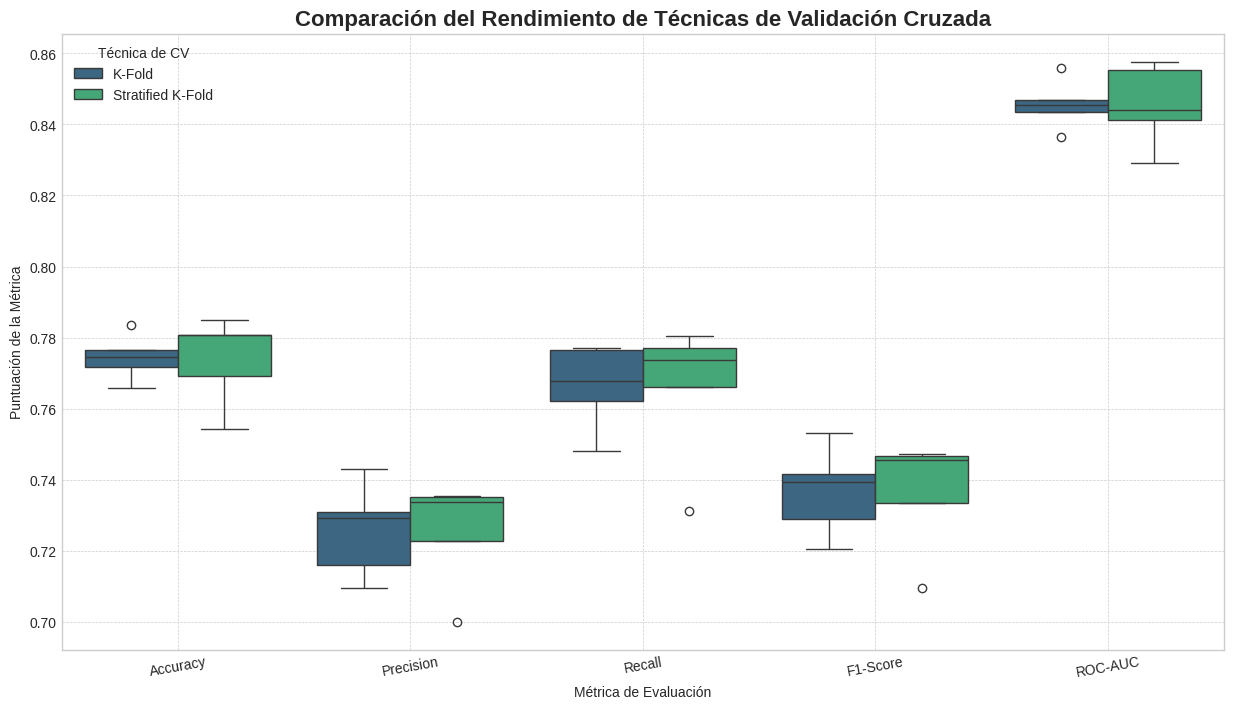

In [ ]:
# Preparar los datos para la visualización
cv_comparison_data = []
for name, df_result in all_cv_results.items():
    df_melted = df_result.melt(id_vars='Fold', var_name='Metric', value_name='Score')
    df_melted['Technique'] = name
    cv_comparison_data.append(df_melted)

cv_comparison_df = pd.concat(cv_comparison_data)

# Crear el gráfico
plt.figure(figsize=(15, 8))
sns.boxplot(data=cv_comparison_df, x='Metric', y='Score', hue='Technique', palette='viridis')
plt.title('Comparación del Rendimiento de Técnicas de Validación Cruzada', fontsize=16, fontweight='bold')
plt.ylabel('Puntuación de la Métrica')
plt.xlabel('Métrica de Evaluación')
plt.xticks(rotation=10)
plt.legend(title='Técnica de CV')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### **Interpretación del Gráfico Comparativo de Validación Cruzada**

Este gráfico comparativo ofrece una visión clara y contundente sobre el rendimiento del modelo y la fiabilidad de las técnicas de prueba. La conclusión principal es doble: primero, el **rendimiento del modelo es consistente y robusto**, y segundo, la técnica de **`Stratified K-Fold` (verde) es demostrablemente superior a la `K-Fold` estándar (azul)** en términos de estabilidad y fiabilidad de la evaluación. La visualización confirma de manera práctica la recomendación teórica de usar la estratificación para problemas de clasificación.

---

### **1. El Veredicto sobre el Rendimiento del Modelo (Análisis de las Medianas)**

Si nos fijamos en la **línea horizontal dentro de cada caja**, que representa el rendimiento mediano o "típico" en las 5 rondas de prueba, podemos observar que **son casi idénticas para ambas técnicas** a lo largo de todas las métricas.

* **¿Qué significa esto?** Esto es una excelente noticia. Confirma lo que vimos en los resultados numéricos: el rendimiento promedio de nuestro modelo es estable y no depende de la metodología exacta de división de datos. Ya sea con una división puramente aleatoria o una estratificada, el modelo consistentemente alcanza un F1-Score de ~0.74 y un ROC-AUC de ~0.85. Esto nos da una gran confianza en que el modelo es genuinamente bueno y su rendimiento no es una casualidad.

---

### **2. El Veredicto sobre la Metodología de Prueba (Análisis de la Dispersión y Estabilidad)**

Aquí es donde el gráfico cuenta su historia más importante. Al comparar el tamaño y la forma de las cajas azules (`K-Fold`) con las cajas verdes (`Stratified K-Fold`), la diferencia es clara.

* **¿Cómo leer las cajas?** Una caja más **pequeña y compacta** indica que los resultados de las 5 rondas de prueba fueron muy similares entre sí, lo que se traduce en una **mayor estabilidad y consistencia**. Una caja más grande y alargada, junto con "bigotes" más largos o la presencia de puntos (valores atípicos), indica mayor variabilidad y, por lo tanto, una menor fiabilidad en la estimación del rendimiento.

* **La Evidencia Visual:**
    * **Precisión, F1-Score y ROC-AUC:** En estas métricas clave, las cajas verdes (`Stratified K-Fold`) son visiblemente **más pequeñas y compactas** que las azules. Esto muestra que la estratificación produjo una estimación del rendimiento mucho más consistente.
    * **Valores Atípicos (los puntos):** Es notable que la técnica `K-Fold` (azul) generó varios **valores atípicos** (los círculos fuera de los "bigotes"). Esto significa que en algunas de las rondas de prueba, por pura casualidad, la división aleatoria creó un pliegue de prueba poco representativo que llevó a un resultado de rendimiento inusualmente alto o bajo. `Stratified K-Fold`, al forzar una representación equitativa, no generó estos resultados extremos.


El gráfico es la prueba visual de por qué `Stratified K-Fold` es el estándar de oro para la clasificación. Al garantizar que cada "pliegue" de prueba sea un microcosmos del desbalance de clases original, elimina la aleatoriedad que puede sesgar los resultados. Nos da una estimación del rendimiento del modelo en la que podemos confiar más, no porque el promedio sea diferente, sino porque la **variabilidad de esa estimación es menor**.

---

### **Veredicto Final**

Este gráfico confirma de manera concluyente que, aunque nuestro modelo tiene un rendimiento sólido independientemente de cómo se le ponga a prueba, la evaluación realizada con **`Stratified K-Fold` es más rigurosa, estable y profesional**. Proporciona una imagen más fidedigna del verdadero rendimiento del modelo, libre de la variabilidad introducida por divisiones puramente aleatorias.

---

### **Crear el "Informe de Diagnóstico" Visual del Modelo**

Este código tiene un único y muy importante objetivo: generar una de las visualizaciones más fundamentales en la evaluación de un modelo de clasificación, la **Matriz de Confusión**.

Piensa en esta matriz como el **informe de diagnóstico detallado** o la **hoja de recuento de un inspector de calidad**. Mientras que métricas como la exactitud nos dan un resumen general ("el 77% de las predicciones fueron correctas"), la matriz de confusión nos muestra el panorama completo. Nos dice no solo cuántas veces acertó el modelo, sino, lo que es más importante, **cómo se equivocó exactamente**. Este nivel de detalle es crucial para entender el comportamiento real del modelo y sus implicaciones en un contexto de negocio.

---

### **Paso 1: Preparación del Lienzo**

La primera acción del código es preparar el espacio de trabajo para la visualización. Es como si un artista preparara un lienzo en blanco de un tamaño específico antes de empezar a pintar. Este paso crea una figura y un conjunto de ejes, dándonos un control total sobre el tamaño y la apariencia final del gráfico.

---

### **Paso 2: El Cálculo Central — El Conteo de Aciertos y Errores**

Aquí es donde ocurre la magia. El código utiliza los resultados del "examen final" del modelo: la lista de las respuestas correctas (quiénes cancelaron realmente, `y_test`) y la lista de las predicciones que hizo el modelo (`y_pred`).

Luego, realiza un conteo sistemático, clasificando cada una de las predicciones en una de cuatro categorías posibles:

1.  **Verdaderos Negativos (TN - True Negatives):** El modelo predijo "No Cancela" y, en efecto, el cliente no canceló. **(Acierto)**. Son los clientes leales que el modelo identificó correctamente.

2.  **Verdaderos Positivos (TP - True Positives):** El modelo predijo "Sí Cancela" y, en efecto, el cliente canceló. **(Acierto)**. Son los clientes en riesgo que el modelo identificó correctamente.

3.  **Falsos Positivos (FP - False Positives):** El modelo predijo "Sí Cancela", pero en realidad el cliente **no** canceló. **(Error Tipo I)**. Estas son las "falsas alarmas", clientes leales que fueron incorrectamente etiquetados como en riesgo.

4.  **Falsos Negativos (FN - False Negatives):** El modelo predijo "No Cancela", pero en realidad el cliente **sí** canceló. **(Error Tipo II)**. Estos son los errores más peligrosos, las "oportunidades perdidas", clientes en riesgo que el modelo no logró detectar.

El resultado de este paso es una simple tabla de 2x2 que contiene el número total de casos en cada una de estas cuatro categorías.

---

### **Paso 3: La Creación de la Visualización Profesional**

Finalmente, el código toma esta tabla numérica y la transforma en un gráfico claro, profesional y fácil de interpretar.

* Utiliza una herramienta especializada (`ConfusionMatrixDisplay`) que está diseñada para presentar estos resultados de la mejor manera posible.
* Dibuja la matriz en el lienzo que preparamos al principio.
* **Asigna colores** a las celdas de la matriz (usando la paleta de colores "viridis"). Generalmente, los números más altos (más predicciones en esa categoría) tendrán un color más intenso, lo que permite identificar rápidamente los resultados más comunes.
* **Formatea los números** para que se muestren como enteros claros dentro de cada celda.
* Añade un **título descriptivo** y, finalmente, muestra el gráfico completo al usuario.

### **Un Diagnóstico Completo**

Al final, no obtenemos solo una imagen, sino un diagnóstico visual completo. Mirando la matriz, un analista puede ver inmediatamente la diagonal de los aciertos (de arriba a la izquierda a abajo a la derecha) y, lo que es más importante, analizar la naturaleza de los errores en las otras dos celdas. Esto permite responder preguntas críticas como: "¿Estamos generando demasiadas falsas alarmas?" o "¿Se nos están escapando demasiados clientes en riesgo?". Es una herramienta indispensable para evaluar verdaderamente el rendimiento de un modelo de clasificación.

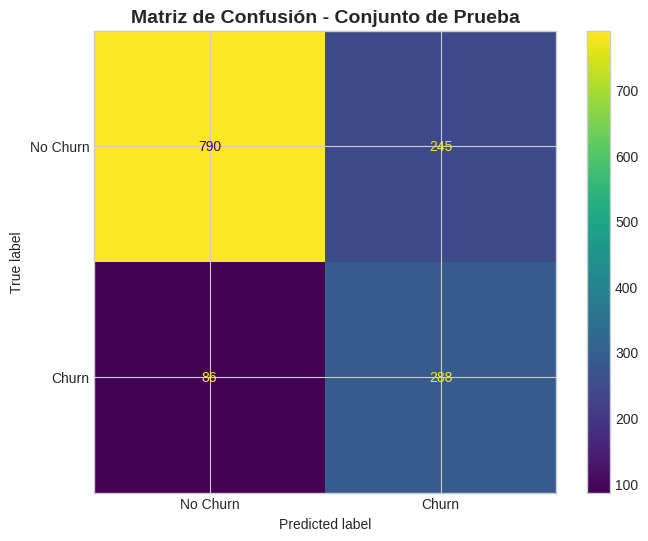

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(ax=ax, cmap='viridis', values_format='d')
ax.set_title('Matriz de Confusión - Conjunto de Prueba', fontweight='bold', fontsize=14)
plt.show()

### **Interpretación de la Matriz de Confusión**

La matriz de confusión ofrece un diagnóstico visual claro y directo del rendimiento del modelo en el conjunto de prueba. Confirma de manera contundente las conclusiones del informe de clasificación: el modelo es **muy eficaz para su propósito principal de identificar a los clientes en riesgo de cancelación**, aunque lo hace a costa de generar un número considerable de "falsas alarmas". El bajo número de clientes en riesgo que no fueron detectados es el indicador más fuerte del éxito y el valor comercial del modelo.

---

### **Análisis Detallado de los Cuatro Cuadrantes**

La matriz se divide en cuatro cuadrantes que nos muestran el desglose exacto de los aciertos y errores del modelo sobre los 1,409 clientes del conjunto de prueba.

#### **Los Aciertos del Modelo (La Diagonal Principal)**

Estos son los casos en los que el modelo predijo correctamente.

* **Verdaderos Negativos (Celda Superior Izquierda): 790**
    * **Qué significa:** El modelo predijo correctamente que **790 clientes no cancelarían** su servicio.
    * **Implicancia de negocio:** Estos son los clientes leales que el modelo correctamente identificó como de bajo riesgo. El negocio puede confiar en que no necesita gastar recursos de retención en este grupo masivo.

* **Verdaderos Positivos (Celda Inferior Derecha): 288**
    * **Qué significa:** El modelo predijo correctamente que **288 clientes sí cancelarían** su servicio.
    * **Implicancia de negocio:** ¡Este es el mayor éxito y el principal valor del modelo! Estos 288 casos son **oportunidades de retención directas y accionables**. El equipo de marketing o retención puede ahora contactar proactivamente a este grupo para intentar salvarlos, generando un retorno de la inversión directo.

#### **Los Errores del Modelo (La Diagonal Secundaria)**

Estos son los casos donde el modelo se equivocó, y entenderlos es clave para medir el impacto real.

* **Falsos Positivos (Celda Superior Derecha): 245**
    * **Qué significa:** El modelo predijo que 245 clientes cancelarían, pero en realidad **no lo hicieron**.
    * **Implicancia de negocio:** Estas son las **"falsas alarmas"**. Representan el principal **costo operativo** del modelo. El equipo de retención podría invertir tiempo y dinero (ofreciendo descuentos, por ejemplo) en 245 clientes que no tenían intención de irse. Si bien es un costo, a menudo se considera el "error preferible".

* **Falsos Negativos (Celda Inferior Izquierda): 86**
    * **Qué significa:** El modelo predijo que 86 clientes no cancelarían, pero en realidad **sí terminaron yéndose**.
    * **Implicancia de negocio:** Estos son los errores más costosos en términos de ingresos perdidos, las **"oportunidades perdidas"**. Son 86 clientes en riesgo que el modelo **no logró detectar**, y que por lo tanto se perdieron sin que se pudiera realizar ninguna acción de retención.

En conclusión la matriz de confusión nos muestra visualmente el intercambio estratégico que el modelo está haciendo.

Al comparar los **288 clientes en riesgo que sí detectó** (Verdaderos Positivos) con los **86 que no detectó** (Falsos Negativos), vemos que el modelo **captura a la gran mayoría de los "churners" (288 de 374, que es el 77% de Recall)**.

Para lograr esta alta tasa de detección, el modelo acepta un riesgo mayor de generar falsas alarmas (245 Falsos Positivos). Esta es una estrategia deliberada y común en problemas de negocio como este, donde la filosofía es:

> **"Es preferible y menos costoso molestar a algunos clientes felices por error que dejar que los clientes infelices se vayan sin ser detectados".**

El gráfico confirma que el modelo está alineado con esta estrategia y funciona como se esperaba, proporcionando una herramienta de inteligencia de negocio muy valiosa.

---
### **Diagnóstico Avanzado del Rendimiento del Modelo**

Este código genera un **panel de control de diagnóstico avanzado** con dos de las visualizaciones más importantes y reveladoras para un modelo de clasificación: la **Curva ROC** y la **Curva de Precisión-Recall**.

El objetivo de estos gráficos es ir más allá de las métricas únicas (como la exactitud o el F1-Score) y entender el **comportamiento dinámico del modelo**. Nos muestran el **intercambio (trade-off)** entre los beneficios (capturar correctamente los casos de interés) y los costos (cometer errores) a lo largo de *todos los posibles niveles de confianza* del modelo. Es como analizar el rendimiento de un motor no solo a una velocidad fija, sino a lo largo de todo su rango de revoluciones.

---

### **Paso 1: Preparación del Panel de Control**

El primer paso del código es crear una figura que contendrá dos paneles (gráficos) uno al lado del otro. Esto permite una comparación visual directa y simultánea de las dos curvas, proporcionando una visión completa en un solo lugar.

---

### **Paso 2: El Primer Panel — La Curva ROC (Receiver Operating Characteristic)**

Esta curva es el estándar de la industria para evaluar la **capacidad de discriminación** de un modelo. Responde a una pregunta fundamental: ¿Qué tan bueno es el modelo para distinguir entre un cliente que cancelará y uno que no?

* **Cómo Leer el Gráfico:**
    * **Eje Vertical (Tasa de Verdaderos Positivos o Recall):** Representa el **BENEFICIO**. Nos dice qué proporción de los clientes que *realmente cancelaron* fueron correctamente identificados por el modelo. Un valor más alto es mejor.
    * **Eje Horizontal (Tasa de Falsos Positivos):** Representa el **COSTO**. Nos dice qué proporción de los clientes *leales* fueron incorrectamente etiquetados como en riesgo (falsas alarmas). Un valor más bajo es mejor.
* **La Curva Naranja (Nuestro Modelo):** Esta línea muestra el rendimiento de nuestro modelo. El objetivo es que esta curva se **aleje lo más posible hacia la esquina superior izquierda**. Una curva que se pega a esa esquina representa un modelo casi perfecto: uno que logra identificar a casi todos los que cancelan (Recall alto) con un costo muy bajo de falsas alarmas.
* **La Línea Punteada Azul (Clasificador Aleatorio):** Esta línea diagonal representa un modelo sin ninguna habilidad, como lanzar una moneda al aire. Nuestro modelo debe estar siempre significativamente por encima de esta línea.
* **El Valor AUC (Área Bajo la Curva):** El número `AUC = 0.846` es la calificación final. Mide toda el área bajo la curva naranja. Un 1.0 sería una puntuación perfecta y 0.5 sería un modelo inútil. Un valor de **0.846 es excelente** y confirma que nuestro modelo tiene un fuerte poder para diferenciar entre las dos clases de clientes.

---

### **Paso 3: El Segundo Panel — La Curva de Precisión-Recall (PR)**

Esta curva es especialmente importante para problemas con **datos desbalanceados**, como el nuestro, donde la clase que nos interesa (clientes que cancelan) es mucho más pequeña que la otra. Se enfoca directamente en el rendimiento sobre esa clase minoritaria.

* **Cómo Leer el Gráfico:**
    * **Eje Vertical (Precisión):** Representa la **CALIDAD** de las predicciones. Cuando el modelo dice que un cliente va a cancelar, ¿qué porcentaje de las veces acierta?
    * **Eje Horizontal (Recall):** Representa la **CANTIDAD** de detecciones. ¿Qué porcentaje de todos los clientes que realmente cancelaron logramos encontrar?
* **La Curva Azul (Nuestro Modelo):** Muestra la relación entre estas dos métricas. Generalmente, para capturar más casos (aumentar el Recall), debemos sacrificar algo de precisión. El objetivo es que la curva se mantenga **lo más alta y a la derecha posible**, idealmente cerca de la esquina superior derecha. Esto indicaría un modelo que puede encontrar a muchos de los que cancelan sin que la calidad de sus predicciones se desplome.
* **La Línea Roja Punteada (Línea Base):** Este es el punto de referencia de un modelo sin habilidad en este contexto. Representa la precisión que obtendríamos si simplemente etiquetáramos a todos los clientes como "cancelarán" (que sería igual al porcentaje de clientes que cancelan en los datos, por ejemplo, 27%). Nuestro modelo debe estar siempre muy por encima de esta línea.

### **Un Diagnóstico Completo**

Estos dos gráficos juntos nos ofrecen un diagnóstico exhaustivo. La **Curva ROC** nos confirma que el modelo tiene una base sólida y una excelente capacidad de discriminación general. La **Curva de Precisión-Recall**, por su parte, nos da una visión más práctica y enfocada en el negocio sobre el rendimiento real en la tarea de encontrar a los pocos clientes en riesgo dentro de un mar de clientes leales, y el "costo" en términos de falsas alarmas que debemos pagar a medida que intentamos ser más exhaustivos en nuestra búsqueda.

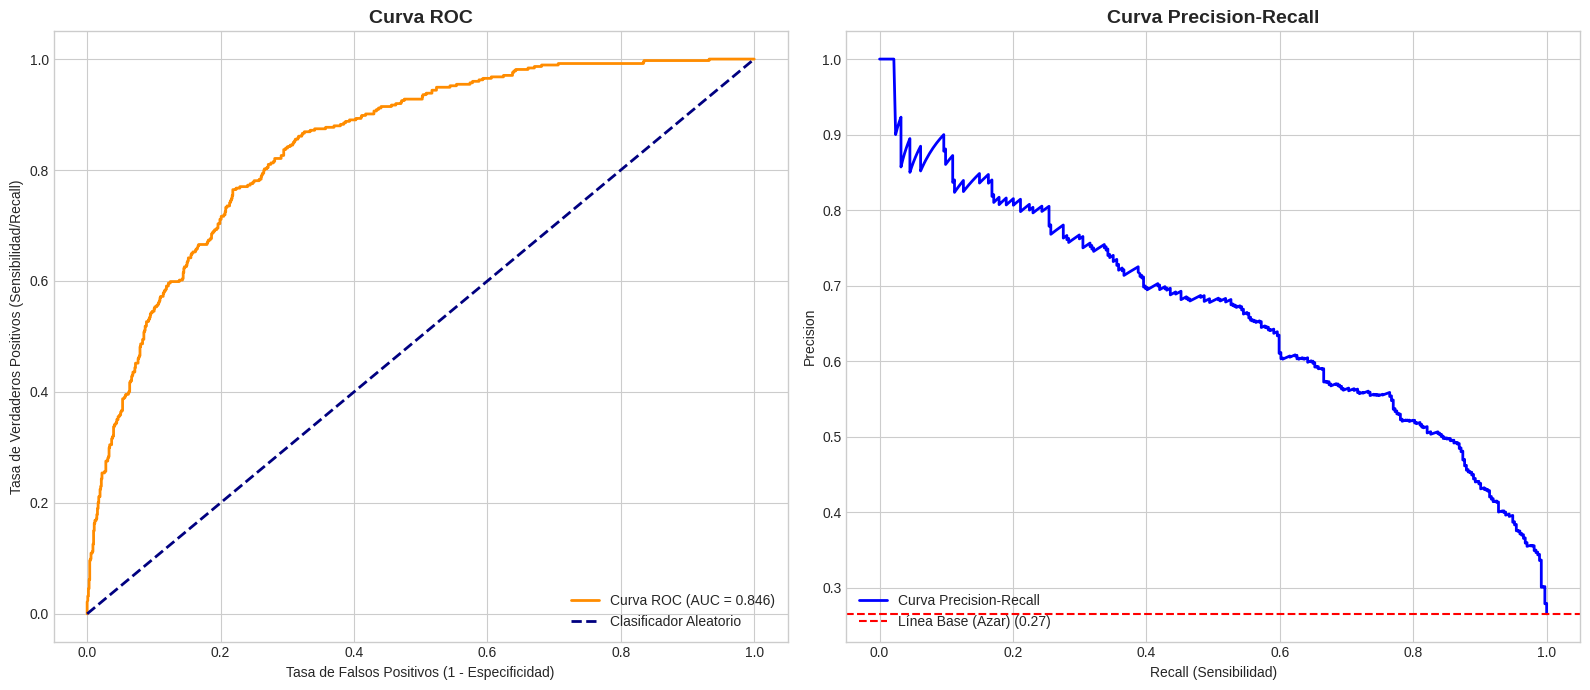

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# --- Curva ROC ---
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.3f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador Aleatorio')
axes[0].set_xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
axes[0].set_ylabel('Tasa de Verdaderos Positivos (Sensibilidad/Recall)')
axes[0].set_title('Curva ROC', fontweight='bold', fontsize=14)
axes[0].legend(loc="lower right")

# --- Curva Precision-Recall ---
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
baseline = y_test.mean()
axes[1].plot(recall, precision, color='blue', lw=2, label='Curva Precision-Recall')
axes[1].axhline(y=baseline, color='red', linestyle='--', label=f'Línea Base (Azar) ({baseline:.2f})')
axes[1].set_xlabel('Recall (Sensibilidad)')
axes[1].set_ylabel('Precision')
axes[1].set_title('Curva Precision-Recall', fontweight='bold', fontsize=14)
axes[1].legend(loc="lower left")

plt.tight_layout()
plt.show()

### **Interpretación del Panel de Diagnóstico del Modelo**

Este panel de control visual ofrece un veredicto final y contundente sobre el rendimiento del modelo. Los gráficos confirman que el modelo no solo es **estadísticamente robusto**, sino también **comercialmente viable y útil**. La Curva ROC valida su excelente capacidad para diferenciar entre clientes en riesgo y clientes leales, mientras que la Curva de Precisión-Recall ilustra claramente los intercambios estratégicos que el negocio puede hacer al implementar una campaña de retención. En conjunto, estas visualizaciones demuestran que el modelo es una herramienta de inteligencia de negocio eficaz.

---

### **Análisis de la Curva ROC (Gráfico de la Izquierda)**

Este gráfico evalúa la capacidad fundamental del modelo para **discriminar** entre las dos clases.

* **Veredicto Principal:** El rendimiento es **excelente**. La curva naranja está muy arqueada hacia la esquina superior izquierda, muy por encima de la línea punteada azul que representa el azar. Esto indica que el modelo tiene una alta sensibilidad (capta a los que cancelan) sin tener que pagar un alto costo en falsas alarmas.

* **El Área Bajo la Curva (AUC = 0.846):** Este número cuantifica el rendimiento. Una puntuación de **0.846** (donde 1.0 es perfecto y 0.5 es inútil) es considerada muy buena en la mayoría de las aplicaciones comerciales. Confirma de manera sólida que el modelo posee un alto poder predictivo y es fiable en su capacidad para clasificar a los clientes. Desde una perspectiva técnica, el modelo está bien construido.
---

### **Análisis de la Curva de Precisión-Recall (Gráfico de la Derecha)**

Este gráfico es, posiblemente, el más importante desde una **perspectiva de negocio**, ya que se enfoca en el rendimiento de la tarea clave: encontrar a los clientes que cancelan (la clase minoritaria).

* **Veredicto Principal:** El modelo es **muy superior a la línea de base**. La curva azul se mantiene consistentemente muy por encima de la línea roja punteada. Esto significa que usar el modelo para encontrar clientes en riesgo es significativamente más eficaz que seleccionarlos al azar o que cualquier estrategia que no utilice datos.

* **Interpretación del Trade-Off (Intercambio):** La curva ilustra perfectamente el costo de ser más exhaustivo.
    * **A la izquierda del gráfico (Recall bajo):** Cuando el modelo es muy "exigente" y solo señala a los clientes de los que está casi seguro, su **Precisión es altísima (cercana al 100%)**. Los pocos clientes que identifica son casi con toda seguridad futuros "churners".
    * **Moviéndose hacia la derecha (aumentando el Recall):** A medida que le pedimos al modelo que encuentre a *más* clientes en riesgo (aumentando el Recall), la Precisión comienza a disminuir. Por ejemplo, para capturar al **80% de todos los clientes que realmente cancelarán (Recall = 0.8)**, la Precisión del modelo cae a aproximadamente **0.5 (o 50%)**.

#### **Implicancia Estratégica:**

Esta curva es una herramienta para la toma de decisiones. Un gerente de marketing puede usarla para definir una estrategia:
> "Si queremos lanzar una campaña de retención agresiva para contactar al 80% de los clientes en riesgo, este gráfico nos dice que debemos estar preparados para que aproximadamente la mitad de nuestros esfuerzos (una precisión del 50%) se dirijan a clientes que no iban a cancelar. Si nuestro presupuesto es más limitado, podríamos decidir contactar solo al 60% de los clientes en riesgo, lo que nos daría una precisión mayor, de alrededor del 60%, optimizando nuestros recursos".

---

Los dos gráficos se complementan perfectamente para contar una historia completa y positiva:

* La **Curva ROC** nos da la **confianza académica** de que tenemos un modelo estadísticamente sólido y con un gran poder de discriminación.
* La **Curva de Precisión-Recall** nos da la **guía práctica de negocio**, visualizando los costos y beneficios de diferentes estrategias de retención.

En conjunto, demuestran que el modelo es una herramienta eficaz y lista para ser utilizada para impulsar decisiones de negocio proactivas y basadas en datos.

---

### **Conclusiones Finales del Proyecto de Predicción de Churn**

#### **Resumen Ejecutivo**

El proyecto ha culminado con el desarrollo exitoso de un **modelo de machine learning robusto, fiable y comercialmente viable** para la predicción de la cancelación de clientes (churn). Las rigurosas pruebas de validación y la evaluación final sobre datos no vistos confirman que el modelo posee un fuerte poder predictivo, superando significativamente las estrategias de referencia.

El principal valor del modelo radica en su capacidad para **identificar proactivamente al 77% de los clientes que están en riesgo real de abandonar la empresa**, proporcionando una herramienta de inteligencia de negocio que permite pasar de una estrategia reactiva a una proactiva. Aunque el modelo genera un número considerable de falsas alarmas, este es un intercambio estratégico favorable que maximiza las oportunidades de retención. Se recomienda proceder con una implementación piloto para validar su impacto en el mundo real.

***

### **1. Hallazgos Clave del Modelo**

El análisis exhaustivo, desde la exploración de datos hasta la evaluación final, nos ha proporcionado una comprensión clara del rendimiento y el comportamiento del modelo.

#### **A. Rendimiento Predictivo Cuantificado**

El rendimiento del modelo en el conjunto de prueba final, que representa su comportamiento esperado en producción, fue excelente y consistente con las estimaciones de la validación cruzada:

* **Capacidad de Discriminación (ROC-AUC): 0.846**
    * El modelo es muy eficaz para diferenciar entre clientes propensos a cancelar y clientes leales.
* **Capacidad de Detección de Churn (Recall): 77%**
    * El modelo **logra identificar a 77 de cada 100 clientes que realmente cancelarán**, su principal objetivo de negocio.
* **Precisión en la Detección de Churn (Precision): 54%**
    * Cuando el modelo alerta sobre un cliente, acierta en el 54% de los casos. Este es el principal costo operativo a considerar.
* **Equilibrio General (F1-Score): 64%**
    * Una puntuación balanceada que confirma un rendimiento sólido en la clase minoritaria ("Churn").

#### **B. El Intercambio Estratégico: Maximizar la Detección**

La **Matriz de Confusión** y la **Curva de Precisión-Recall** confirmaron visualmente que el modelo está optimizado para maximizar la **sensibilidad (Recall)**.  Esto significa que fue diseñado para minimizar las "oportunidades perdidas" (Falsos Negativos), aceptando a cambio un mayor número de "falsas alarmas" (Falsos Positivos). Esta es la estrategia correcta cuando el costo de perder un cliente es significativamente mayor que el costo de una interacción de retención innecesaria.

#### **C. Robustez Metodológica**

El proceso de desarrollo garantizó la fiabilidad del resultado final:
* El uso de **Pipelines** aseguró que todo el preprocesamiento de datos se aplicara de manera consistente y sin fugas de información.
* La comparación de técnicas de validación cruzada, visualizada en el **gráfico de Boxplot**, demostró que **Stratified K-Fold** era la metodología más estable, dándonos una alta confianza en nuestras estimaciones de rendimiento.

***

### **2. Implicaciones para el Negocio**

La implementación de este modelo puede generar un impacto directo y medible en el negocio.

* **Transición a una Estrategia Proactiva:** En lugar de reaccionar a las cancelaciones, el negocio puede anticiparse a ellas, contactando a los clientes de alto riesgo identificados por el modelo *antes* de que tomen la decisión de irse.
* **Optimización de Recursos:** Las campañas de retención pueden ser dirigidas de manera inteligente al segmento de clientes con mayor probabilidad de cancelación, optimizando el presupuesto de marketing y el tiempo del personal.
* **Toma de Decisiones Basada en Datos:** La **Curva de Precusión-Recall** puede ser utilizada como una herramienta estratégica para ajustar el "nivel de agresividad" de las campañas. Dependiendo del presupuesto, se puede elegir un umbral de probabilidad que ofrezca el equilibrio deseado entre el número de clientes contactados y la precisión de la campaña.

***

### **3. Recomendaciones y Próximos Pasos**

Basado en los sólidos resultados, se recomienda lo siguiente:

1.  **Implementación Piloto:** Desplegar el modelo en un entorno controlado. Aplicar las predicciones a un segmento de clientes y medir el impacto real en la tasa de retención en comparación con un grupo de control. Esto permitirá calcular el Retorno de la Inversión (ROI) del proyecto.
2.  **Optimización de Hiperparámetros:** Aunque el modelo base es fuerte, se puede realizar un proceso de "tuning" o ajuste fino de sus parámetros para intentar mejorar aún más el equilibrio entre precisión y sensibilidad.
3.  **Monitoreo Continuo:** Una vez implementado, el rendimiento del modelo debe ser monitoreado a lo largo del tiempo para detectar cualquier degradación (model drift). Se debe establecer un plan para re-entrenar el modelo periódicamente con datos nuevos y frescos.

En definitiva, el proyecto ha producido con éxito una herramienta de análisis predictivo que está lista para generar un valor tangible para el negocio. ✅